In [1]:
import tensorflow as tf
import numpy as np
import sparse
import tensorly 
import tensorly.contrib.sparse as stl
from tensorly.decomposition import parafac
from tensorly.decomposition import robust_pca
import time

from tqdm import tqdm 
import random
import numpy as np
import time
import matplotlib 
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import losses

from sklearn.model_selection import train_test_split

from train import *
from utils import *

In [2]:
mnist = tf.keras.datasets.mnist
(Xs_tr, Ys_tr), (Xs_te, Ys_te) = mnist.load_data()

num_train = len(Ys_tr)
num_test = len(Ys_te)

Xs_tr = Xs_tr.reshape(num_train,28,28,1)
Xs_te = Xs_te.reshape(num_test,28,28,1)

Xs_tr = Xs_tr/255
Xs_te = Xs_te/255

Ys_tr = to_categorical(Ys_tr, num_classes = 10)
Ys_te = to_categorical(Ys_te, num_classes = 10)

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(Xs_tr, Ys_tr), (Xs_te, Ys_te) = fashion_mnist.load_data()

# num_train = len(Ys_tr)
# num_test = len(Ys_te)

# Xs_tr = Xs_tr.reshape(num_train,28,28,1)
# Xs_te = Xs_te.reshape(num_test,28,28,1)

# Xs_tr = Xs_tr/255
# Xs_te = Xs_te/255

# Ys_tr = to_categorical(Ys_tr, num_classes = 10)
# Ys_te = to_categorical(Ys_te, num_classes = 10)

In [2]:
score_neuron_lr_fm = np.load("scores/score_neuron_lr_fm.npy")
score_mom_lr_fm = np.load("scores/score_mom_lr_fm.npy")
score_neuron_mom_fm = np.load("scores/score_neuron_mom_fm.npy")

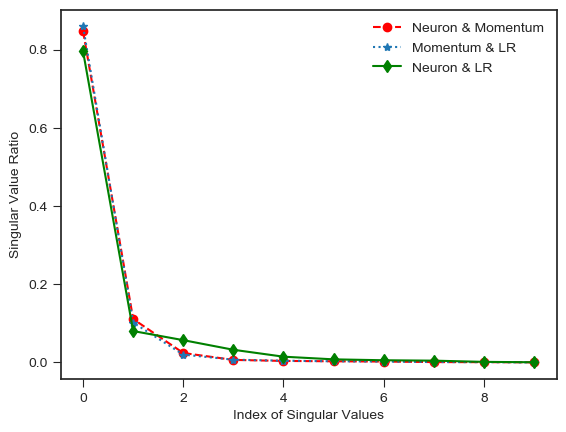

In [30]:
_, s_nm, _ = np.linalg.svd(score_neuron_mom_fm, full_matrices=True)
_, s_ml, _ = np.linalg.svd(score_mom_lr_fm, full_matrices=True)
_, s_nl, _ = np.linalg.svd(score_neuron_lr_fm, full_matrices=True)
plt.plot(calc_percentage(s_nm),color = "red",marker='o', linestyle='dashed')
plt.plot(calc_percentage(s_ml),marker='*', linestyle='dotted')
plt.plot(calc_percentage(s_nl),color = "green",marker='d')
plt.xlabel("Index of Singular Values")
plt.ylabel("Singular Value Ratio")
plt.style.use('seaborn-ticks')
plt.legend(['Neuron & Momentum','Momentum & LR','Neuron & LR'], loc='upper right')
plt.savefig("test_fm.png")

# Experiment: Singular Value Decay

In [3]:
learn_rates = np.linspace(0.001, 0.1, 10)#[0.001, 0.005, 0.01]
neurons = np.arange(5, 100, 10)#[10, 20, 30]
momenta = np.linspace(0.0, 1.0, 10)

num_neurons = len(neurons)
num_learn_rates = len(learn_rates)
num_mom = len(momenta)

print("Learning Rates: {}".format(learn_rates))
print("Number of Neurons: {}".format(neurons))
print("Momentum Choices: {}".format(momenta))

Learning Rates: [0.001 0.012 0.023 0.034 0.045 0.056 0.067 0.078 0.089 0.1  ]
Number of Neurons: [ 5 15 25 35 45 55 65 75 85 95]
Momentum Choices: [0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]


In [4]:
# score_neuron_lr = np.zeros([num_neurons, num_learn_rates])
# score_mom_lr = np.zeros([num_mom,num_learn_rates])
# score_neuron_mom = np.zeros([num_neurons, num_mom])

# score = np.zeros([num_learn_rates,num_neurons,num_mom])
# train_times = np.zeros_like(score)

# train_times_nl = np.zeros_like(score_neuron_lr)
# train_times_ml = np.zeros_like(score_mom_lr)
# train_times_nm = np.zeros_like(score_neuron_mom)

score_neuron_lr = np.load("scores/score_neuron_lr")
score_mom_lr = np.load("scores/score_mom_lr.npy")
score_neuron_mom = np.load("scores/score_neuron_mom.npy")

# train_times_nl = np.load("traintimes/score_neuron_lr")
train_times_ml = np.load("traintimes/score_mom_lr_times.npy")
train_times_nm = np.load("traintimes/score_neuron_mom_times.npy")

score = np.load("scores/score_1000.npy")
train_times = np.load("traintimes/score_1000_times.npy")

In [4]:
score = np.zeros([num_learn_rates,num_neurons,num_mom])
train_times = np.zeros_like(score)

In [5]:
count = 0
for k, learn_rate in enumerate(learn_rates):
    for i, neur in enumerate(neurons):
        for j, mom in enumerate(momenta):
            model, train_times[k,i,j] = train_model(Xs_tr,Ys_tr,10,learn_rate, neur, mom)
            score[k,i,j], _ = model.evaluate(Xs_te, Ys_te, verbose=0)
            count += 1
            print("Finished: {}".format(count))

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 2.2367 - accuracy: 0.1514
Epoch 2/2
60000/60000 [==============================] - 1s 25us/sample - loss: 1.9531 - accuracy: 0.3365
Finished: 1
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 29us/sample - loss: 2.0770 - accuracy: 0.2037
Epoch 2/2
60000/60000 [==============================] - 2s 26us/sample - loss: 1.6269 - accuracy: 0.4600
Finished: 2
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 30us/sample - loss: 2.0430 - accuracy: 0.2274
Epoch 2/2
60000/60000 [==============================] - 2s 26us/sample - loss: 1.6242 - accuracy: 0.4606
Finished: 3
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 29us/sample - loss: 2.0218 - accuracy: 0.3082
Epoch 2/2
60000/60000 [==============================] - 2s 26us/sample - loss: 1.5707 - accuracy: 0.5002
Finished: 4
Train on 600

60000/60000 [==============================] - 2s 31us/sample - loss: 1.5958 - accuracy: 0.5674
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.8177 - accuracy: 0.8125
Finished: 34
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 1.4434 - accuracy: 0.6182
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.7113 - accuracy: 0.8328
Finished: 35
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 1.3458 - accuracy: 0.6581
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.6299 - accuracy: 0.8513
Finished: 36
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 1.1946 - accuracy: 0.6975
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.5434 - accuracy: 0.8632
Finished: 37
Train on 60000 samples
Epoch 1/2
60000/60

60000/60000 [==============================] - 2s 38us/sample - loss: 1.0187 - accuracy: 0.8072
Epoch 2/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.9273 - accuracy: 0.7773
Finished: 100
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 28us/sample - loss: 1.3037 - accuracy: 0.5891
Epoch 2/2
60000/60000 [==============================] - 2s 26us/sample - loss: 0.6941 - accuracy: 0.8030
Finished: 101
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 1.1371 - accuracy: 0.6496
Epoch 2/2
60000/60000 [==============================] - 2s 26us/sample - loss: 0.6027 - accuracy: 0.8286
Finished: 102
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 28us/sample - loss: 1.0622 - accuracy: 0.6725
Epoch 2/2
60000/60000 [==============================] - 2s 26us/sample - loss: 0.5409 - accuracy: 0.8466
Finished: 103
Train on 60000 samples
Epoch 1/2
6000

60000/60000 [==============================] - 2s 31us/sample - loss: 0.5684 - accuracy: 0.8522
Epoch 2/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.3091 - accuracy: 0.9128
Finished: 133
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.5555 - accuracy: 0.8497
Epoch 2/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.3047 - accuracy: 0.9139
Finished: 134
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.5438 - accuracy: 0.8539
Epoch 2/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.2942 - accuracy: 0.9169
Finished: 135
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.4836 - accuracy: 0.8684
Epoch 2/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.2731 - accuracy: 0.9226
Finished: 136
Train on 60000 samples
Epoch 1/2
6000

60000/60000 [==============================] - 2s 31us/sample - loss: 0.4575 - accuracy: 0.8764
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.2575 - accuracy: 0.9261
Finished: 166
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 30us/sample - loss: 0.4345 - accuracy: 0.8799
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.2423 - accuracy: 0.9305
Finished: 167
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 32us/sample - loss: 0.3830 - accuracy: 0.8901
Epoch 2/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.2095 - accuracy: 0.9397
Finished: 168
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.3109 - accuracy: 0.9109
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1547 - accuracy: 0.9557
Finished: 169
Train on 60000 samples
Epoch 1/2
6000

60000/60000 [==============================] - 2s 31us/sample - loss: 0.3050 - accuracy: 0.9100
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1478 - accuracy: 0.9576
Finished: 199
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 1.6823 - accuracy: 0.5250
Epoch 2/2
60000/60000 [==============================] - 2s 29us/sample - loss: 2.4106 - accuracy: 0.2096
Finished: 200
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.8945 - accuracy: 0.7223
Epoch 2/2
60000/60000 [==============================] - 2s 25us/sample - loss: 0.5192 - accuracy: 0.8445
Finished: 201
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.7500 - accuracy: 0.7746
Epoch 2/2
60000/60000 [==============================] - 2s 26us/sample - loss: 0.4645 - accuracy: 0.8640
Finished: 202
Train on 60000 samples
Epoch 1/2
6000

60000/60000 [==============================] - 2s 31us/sample - loss: 0.4908 - accuracy: 0.8674
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.2808 - accuracy: 0.9191
Finished: 232
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 30us/sample - loss: 0.4610 - accuracy: 0.8763
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 0.2636 - accuracy: 0.9257
Finished: 233
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.4578 - accuracy: 0.8741
Epoch 2/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.2558 - accuracy: 0.9277
Finished: 234
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 30us/sample - loss: 0.4230 - accuracy: 0.8820
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 0.2515 - accuracy: 0.9290
Finished: 235
Train on 60000 samples
Epoch 1/2
6000

60000/60000 [==============================] - 2s 31us/sample - loss: 0.4119 - accuracy: 0.8858
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.2316 - accuracy: 0.9343
Finished: 265
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.3877 - accuracy: 0.8917
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.2126 - accuracy: 0.9394
Finished: 266
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.3422 - accuracy: 0.9033
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1857 - accuracy: 0.9470
Finished: 267
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 30us/sample - loss: 0.3103 - accuracy: 0.9105
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1578 - accuracy: 0.9541
Finished: 268
Train on 60000 samples
Epoch 1/2
6000

60000/60000 [==============================] - 2s 31us/sample - loss: 0.3027 - accuracy: 0.9133
Epoch 2/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.1505 - accuracy: 0.9565
Finished: 298
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.2530 - accuracy: 0.9258
Epoch 2/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.1156 - accuracy: 0.9654
Finished: 299
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 2.2764 - accuracy: 0.3493
Epoch 2/2
60000/60000 [==============================] - 2s 29us/sample - loss: 3.6529 - accuracy: 0.1312
Finished: 300
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.9424 - accuracy: 0.6933
Epoch 2/2
60000/60000 [==============================] - 2s 25us/sample - loss: 0.5905 - accuracy: 0.8263
Finished: 301
Train on 60000 samples
Epoch 1/2
6000

60000/60000 [==============================] - 2s 30us/sample - loss: 0.4530 - accuracy: 0.8749
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 0.2627 - accuracy: 0.9236
Finished: 331
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.4404 - accuracy: 0.8771
Epoch 2/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.2535 - accuracy: 0.9282
Finished: 332
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.4250 - accuracy: 0.8820
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.2529 - accuracy: 0.9271
Finished: 333
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.3982 - accuracy: 0.8887
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.2327 - accuracy: 0.9335
Finished: 334
Train on 60000 samples
Epoch 1/2
6000

60000/60000 [==============================] - 2s 36us/sample - loss: 0.3883 - accuracy: 0.8915
Epoch 2/2
60000/60000 [==============================] - 2s 30us/sample - loss: 0.2101 - accuracy: 0.9398
Finished: 364
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 30us/sample - loss: 0.3593 - accuracy: 0.8977
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 0.1930 - accuracy: 0.9449
Finished: 365
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 30us/sample - loss: 0.3344 - accuracy: 0.9041
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 0.1772 - accuracy: 0.9493
Finished: 366
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.3092 - accuracy: 0.9107
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1556 - accuracy: 0.9553
Finished: 367
Train on 60000 samples
Epoch 1/2
6000

60000/60000 [==============================] - 2s 30us/sample - loss: 0.3045 - accuracy: 0.9122
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1473 - accuracy: 0.9571
Finished: 397
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 32us/sample - loss: 0.2740 - accuracy: 0.9201
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1266 - accuracy: 0.9628
Finished: 398
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.2407 - accuracy: 0.9280
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 0.1095 - accuracy: 0.9668
Finished: 399
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 30us/sample - loss: 2.5897 - accuracy: 0.2815
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 3.5669 - accuracy: 0.1103
Finished: 400
Train on 60000 samples
Epoch 1/2
6000

60000/60000 [==============================] - 2s 29us/sample - loss: 2.8495 - accuracy: 0.1378
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 3.0191 - accuracy: 0.0998
Finished: 430
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 30us/sample - loss: 0.4028 - accuracy: 0.8891
Epoch 2/2
60000/60000 [==============================] - 2s 26us/sample - loss: 0.2359 - accuracy: 0.9328
Finished: 431
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.4008 - accuracy: 0.8872
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.2355 - accuracy: 0.9320
Finished: 432
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.4025 - accuracy: 0.8861
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.2277 - accuracy: 0.9356
Finished: 433
Train on 60000 samples
Epoch 1/2
6000

60000/60000 [==============================] - 2s 34us/sample - loss: 0.3758 - accuracy: 0.8944
Epoch 2/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.2058 - accuracy: 0.9417
Finished: 463
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 30us/sample - loss: 0.3422 - accuracy: 0.9038
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 0.1836 - accuracy: 0.9471
Finished: 464
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 30us/sample - loss: 0.3262 - accuracy: 0.9068
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1686 - accuracy: 0.9514
Finished: 465
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.3093 - accuracy: 0.9107
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 0.1617 - accuracy: 0.9527
Finished: 466
Train on 60000 samples
Epoch 1/2
6000

60000/60000 [==============================] - 2s 32us/sample - loss: 0.3106 - accuracy: 0.9113
Epoch 2/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.1522 - accuracy: 0.9554
Finished: 496
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 32us/sample - loss: 0.2841 - accuracy: 0.9178
Epoch 2/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.1351 - accuracy: 0.9606
Finished: 497
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 32us/sample - loss: 0.2525 - accuracy: 0.9258
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1130 - accuracy: 0.9667
Finished: 498
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 30us/sample - loss: 0.2270 - accuracy: 0.9312
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 0.1071 - accuracy: 0.9669
Finished: 499
Train on 60000 samples
Epoch 1/2
6000

60000/60000 [==============================] - 2s 30us/sample - loss: 0.3221 - accuracy: 0.9036
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 0.2079 - accuracy: 0.9384
Finished: 529
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 29us/sample - loss: 4.0800 - accuracy: 0.1790
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 4.4004 - accuracy: 0.0999
Finished: 530
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 30us/sample - loss: 0.3765 - accuracy: 0.8931
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 0.2168 - accuracy: 0.9367
Finished: 531
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.3842 - accuracy: 0.8909
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.2157 - accuracy: 0.9391
Finished: 532
Train on 60000 samples
Epoch 1/2
6000

60000/60000 [==============================] - 3s 51us/sample - loss: 0.3515 - accuracy: 0.9026
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1880 - accuracy: 0.9462
Finished: 562
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.3449 - accuracy: 0.9017
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1842 - accuracy: 0.9462
Finished: 563
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.3314 - accuracy: 0.9047
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1713 - accuracy: 0.9516
Finished: 564
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.3121 - accuracy: 0.9108
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1562 - accuracy: 0.9547
Finished: 565
Train on 60000 samples
Epoch 1/2
6000

60000/60000 [==============================] - 2s 31us/sample - loss: 0.3118 - accuracy: 0.9103
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1542 - accuracy: 0.9560
Finished: 595
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 30us/sample - loss: 0.2879 - accuracy: 0.9151
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1367 - accuracy: 0.9603
Finished: 596
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 30us/sample - loss: 0.2643 - accuracy: 0.9232
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1223 - accuracy: 0.9640
Finished: 597
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.2360 - accuracy: 0.9288
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1080 - accuracy: 0.9674
Finished: 598
Train on 60000 samples
Epoch 1/2
6000

60000/60000 [==============================] - 2s 30us/sample - loss: 0.3036 - accuracy: 0.9087
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 0.1823 - accuracy: 0.9468
Finished: 628
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.3408 - accuracy: 0.8991
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 0.2163 - accuracy: 0.9360
Finished: 629
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 29us/sample - loss: 2.7987 - accuracy: 0.1580
Epoch 2/2
60000/60000 [==============================] - 2s 26us/sample - loss: 3.4490 - accuracy: 0.1003
Finished: 630
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 30us/sample - loss: 0.3701 - accuracy: 0.8949
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 0.2116 - accuracy: 0.9393
Finished: 631
Train on 60000 samples
Epoch 1/2
6000

60000/60000 [==============================] - 2s 29us/sample - loss: 0.3495 - accuracy: 0.9022
Epoch 2/2
60000/60000 [==============================] - 2s 26us/sample - loss: 0.1897 - accuracy: 0.9451
Finished: 661
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 30us/sample - loss: 0.3357 - accuracy: 0.9036
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 0.1735 - accuracy: 0.9492
Finished: 662
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 30us/sample - loss: 0.3269 - accuracy: 0.9072
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 0.1674 - accuracy: 0.9519
Finished: 663
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 30us/sample - loss: 0.3088 - accuracy: 0.9108
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 0.1607 - accuracy: 0.9537
Finished: 664
Train on 60000 samples
Epoch 1/2
6000

60000/60000 [==============================] - 2s 30us/sample - loss: 0.2971 - accuracy: 0.9152
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 0.1475 - accuracy: 0.9570
Finished: 694
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 30us/sample - loss: 0.2942 - accuracy: 0.9155
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 0.1418 - accuracy: 0.9588
Finished: 695
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 30us/sample - loss: 0.2706 - accuracy: 0.9218
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 0.1234 - accuracy: 0.9639
Finished: 696
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 3s 55us/sample - loss: 0.2518 - accuracy: 0.9263
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1143 - accuracy: 0.9655
Finished: 697
Train on 60000 samples
Epoch 1/2
6000

60000/60000 [==============================] - 2s 29us/sample - loss: 0.3011 - accuracy: 0.9121
Epoch 2/2
60000/60000 [==============================] - 2s 26us/sample - loss: 0.1797 - accuracy: 0.9468
Finished: 727
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.2943 - accuracy: 0.9122
Epoch 2/2
60000/60000 [==============================] - 2s 26us/sample - loss: 0.1741 - accuracy: 0.9489
Finished: 728
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.3187 - accuracy: 0.9056
Epoch 2/2
60000/60000 [==============================] - 2s 26us/sample - loss: 0.2071 - accuracy: 0.9408
Finished: 729
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 29us/sample - loss: 2.8887 - accuracy: 0.1383
Epoch 2/2
60000/60000 [==============================] - 2s 26us/sample - loss: 3.3317 - accuracy: 0.1013
Finished: 730
Train on 60000 samples
Epoch 1/2
6000

60000/60000 [==============================] - 2s 29us/sample - loss: 2.8411 - accuracy: 0.1475
Epoch 2/2
60000/60000 [==============================] - 2s 26us/sample - loss: 4.0076 - accuracy: 0.1076
Finished: 760
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.3382 - accuracy: 0.9039
Epoch 2/2
60000/60000 [==============================] - 2s 26us/sample - loss: 0.1805 - accuracy: 0.9482
Finished: 761
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 30us/sample - loss: 0.3342 - accuracy: 0.9040
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 0.1737 - accuracy: 0.9500
Finished: 762
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.3164 - accuracy: 0.9080
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 0.1680 - accuracy: 0.9512
Finished: 763
Train on 60000 samples
Epoch 1/2
6000

60000/60000 [==============================] - 2s 30us/sample - loss: 0.3036 - accuracy: 0.9137
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1524 - accuracy: 0.9563
Finished: 793
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 30us/sample - loss: 0.2896 - accuracy: 0.9163
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1427 - accuracy: 0.9578
Finished: 794
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 30us/sample - loss: 0.2760 - accuracy: 0.9190
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 0.1338 - accuracy: 0.9605
Finished: 795
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 30us/sample - loss: 0.2614 - accuracy: 0.9241
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 0.1212 - accuracy: 0.9639
Finished: 796
Train on 60000 samples
Epoch 1/2
6000

Finished: 825
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.2918 - accuracy: 0.9138
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 0.1716 - accuracy: 0.9488
Finished: 826
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.3045 - accuracy: 0.9107
Epoch 2/2
60000/60000 [==============================] - 2s 26us/sample - loss: 0.1786 - accuracy: 0.9461
Finished: 827
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 30us/sample - loss: 0.3038 - accuracy: 0.9092
Epoch 2/2
60000/60000 [==============================] - 2s 26us/sample - loss: 0.1963 - accuracy: 0.9427
Finished: 828
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.3465 - accuracy: 0.8971
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 0.2381 - accuracy: 0.9334
Fini

60000/60000 [==============================] - 2s 29us/sample - loss: 0.3215 - accuracy: 0.9080
Epoch 2/2
60000/60000 [==============================] - 2s 26us/sample - loss: 0.1633 - accuracy: 0.9518
Finished: 891
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 30us/sample - loss: 0.3012 - accuracy: 0.9137
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 0.1462 - accuracy: 0.9585
Finished: 892
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 30us/sample - loss: 0.2927 - accuracy: 0.9168
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 0.1417 - accuracy: 0.9587
Finished: 893
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 30us/sample - loss: 0.2795 - accuracy: 0.9176
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 0.1324 - accuracy: 0.9614
Finished: 894
Train on 60000 samples
Epoch 1/2
6000

60000/60000 [==============================] - 2s 30us/sample - loss: 0.3207 - accuracy: 0.9064
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 0.1860 - accuracy: 0.9459
Finished: 924
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 30us/sample - loss: 0.3204 - accuracy: 0.9052
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 0.1808 - accuracy: 0.9468
Finished: 925
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 30us/sample - loss: 0.2965 - accuracy: 0.9125
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 0.1744 - accuracy: 0.9478
Finished: 926
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 30us/sample - loss: 0.2947 - accuracy: 0.9124
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 0.1841 - accuracy: 0.9462
Finished: 927
Train on 60000 samples
Epoch 1/2
6000

60000/60000 [==============================] - 2s 30us/sample - loss: 0.2525 - accuracy: 0.9245
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 0.1279 - accuracy: 0.9613
Finished: 957
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 30us/sample - loss: 0.2479 - accuracy: 0.9240
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 0.1390 - accuracy: 0.9578
Finished: 958
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.3056 - accuracy: 0.9084
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1831 - accuracy: 0.9474
Finished: 959
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 30us/sample - loss: 3.0154 - accuracy: 0.1558
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 4.5560 - accuracy: 0.1014
Finished: 960
Train on 60000 samples
Epoch 1/2
6000

60000/60000 [==============================] - 2s 31us/sample - loss: 3.2042 - accuracy: 0.1795
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 4.8432 - accuracy: 0.1055
Finished: 990
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 30us/sample - loss: 0.3037 - accuracy: 0.9137
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 0.1470 - accuracy: 0.9575
Finished: 991
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.2942 - accuracy: 0.9148
Epoch 2/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.1407 - accuracy: 0.9589
Finished: 992
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.2890 - accuracy: 0.9145
Epoch 2/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.1341 - accuracy: 0.9614
Finished: 993
Train on 60000 samples
Epoch 1/2
6000

In [8]:
np.save("score_1000_new",score)
np.save("score_1000_times_new",train_times)

In [9]:
#fix momentum = 0.9, fill in score_neuron_lr
for k, neur in enumerate(neurons):
    for i, learn_rate in enumerate(learn_rates):        
        model, train_times_nl[k, i] = train_model(Xs_tr,Ys_tr,10,learn_rate, neur, 0.9)
        score_neuron_lr[k, i], _ = model.evaluate(Xs_te, Ys_te, verbose=0)

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 1.4211 - accuracy: 0.5542
Epoch 2/2
60000/60000 [==============================] - 2s 26us/sample - loss: 0.8805 - accuracy: 0.7390
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.5965 - accuracy: 0.8150
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 0.4524 - accuracy: 0.8674
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 27us/sample - loss: 0.6854 - accuracy: 0.7868
Epoch 2/2
60000/60000 [==============================] - 1s 25us/sample - loss: 0.5667 - accuracy: 0.8327
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 1.2909 - accuracy: 0.4949
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 1.1232 - accuracy: 0.5929
Train on 60000 samples
Epoch 1/2
60000/60000 [==============

60000/60000 [==============================] - 2s 30us/sample - loss: 0.2951 - accuracy: 0.9147
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1818 - accuracy: 0.9501
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.6730 - accuracy: 0.8270
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.3430 - accuracy: 0.9046
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.2995 - accuracy: 0.9122
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1446 - accuracy: 0.9585
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.2517 - accuracy: 0.9261
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1145 - accuracy: 0.9655
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 36us/sampl

In [6]:

# fix number of neurons = 50, fill in score_mom_lr
for k, mom in enumerate(momenta):
    for i, learn_rate in enumerate(learn_rates):        
        model, train_times_ml[k, i] = train_model(Xs_tr,Ys_tr,10,learn_rate, 50, mom)
        score_mom_lr[k, i], _ = model.evaluate(Xs_te, Ys_te, verbose=0)

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 3s 46us/sample - loss: 1.7165 - accuracy: 0.5580
Epoch 2/2
60000/60000 [==============================] - 2s 42us/sample - loss: 0.9834 - accuracy: 0.7799
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 41us/sample - loss: 0.6053 - accuracy: 0.8451
Epoch 2/2
60000/60000 [==============================] - 2s 41us/sample - loss: 0.3292 - accuracy: 0.9080
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 3s 45us/sample - loss: 0.5309 - accuracy: 0.8541
Epoch 2/2
60000/60000 [==============================] - 3s 42us/sample - loss: 0.2855 - accuracy: 0.9179
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 3s 45us/sample - loss: 0.4323 - accuracy: 0.8810
Epoch 2/2
60000/60000 [==============================] - 2s 41us/sample - loss: 0.2466 - accuracy: 0.9298
Train on 60000 samples
Epoch 1/2
60000/60000 [==============

60000/60000 [==============================] - 3s 42us/sample - loss: 0.2487 - accuracy: 0.9246
Epoch 2/2
60000/60000 [==============================] - 3s 43us/sample - loss: 0.1266 - accuracy: 0.9621
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 3s 43us/sample - loss: 0.9815 - accuracy: 0.7618
Epoch 2/2
60000/60000 [==============================] - 2s 42us/sample - loss: 0.4581 - accuracy: 0.8790
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 3s 47us/sample - loss: 0.3832 - accuracy: 0.8931
Epoch 2/2
60000/60000 [==============================] - 2s 38us/sample - loss: 0.2107 - accuracy: 0.9406
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 3s 42us/sample - loss: 0.3131 - accuracy: 0.9111
Epoch 2/2
60000/60000 [==============================] - 3s 42us/sample - loss: 0.1636 - accuracy: 0.9523
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 3s 44us/sampl

In [11]:
#fix learning rate = 0.001, fill in score_neuron_mom
for k, neur in enumerate(neurons):
    for i, mom in enumerate(momenta):        
        model, train_times_nm[k, i] = train_model(Xs_tr,Ys_tr,10,0.001, neur, mom)
        score_neuron_mom[k, i], _ = model.evaluate(Xs_te, Ys_te, verbose=0)

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 3s 45us/sample - loss: 2.2591 - accuracy: 0.1325
Epoch 2/2
60000/60000 [==============================] - 3s 45us/sample - loss: 2.1207 - accuracy: 0.1987
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 3s 48us/sample - loss: 2.0449 - accuracy: 0.3004
Epoch 2/2
60000/60000 [==============================] - 3s 45us/sample - loss: 1.6763 - accuracy: 0.4734
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 3s 45us/sample - loss: 2.0535 - accuracy: 0.2450
Epoch 2/2
60000/60000 [==============================] - 3s 43us/sample - loss: 1.4589 - accuracy: 0.4980
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 3s 54us/sample - loss: 2.0335 - accuracy: 0.3441
Epoch 2/2
60000/60000 [==============================] - 3s 47us/sample - loss: 1.6570 - accuracy: 0.4956
Train on 60000 samples
Epoch 1/2
60000/60000 [==============

60000/60000 [==============================] - 3s 48us/sample - loss: 1.0062 - accuracy: 0.8007
Epoch 2/2
60000/60000 [==============================] - 3s 47us/sample - loss: 1.1343 - accuracy: 0.7311
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 3s 42us/sample - loss: 1.7682 - accuracy: 0.5195
Epoch 2/2
60000/60000 [==============================] - 3s 42us/sample - loss: 1.0000 - accuracy: 0.7869
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 3s 44us/sample - loss: 1.5870 - accuracy: 0.5933
Epoch 2/2
60000/60000 [==============================] - 3s 45us/sample - loss: 0.8938 - accuracy: 0.8015
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 3s 51us/sample - loss: 1.5665 - accuracy: 0.6057
Epoch 2/2
60000/60000 [==============================] - 3s 45us/sample - loss: 0.8100 - accuracy: 0.8249
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 3s 43us/sampl

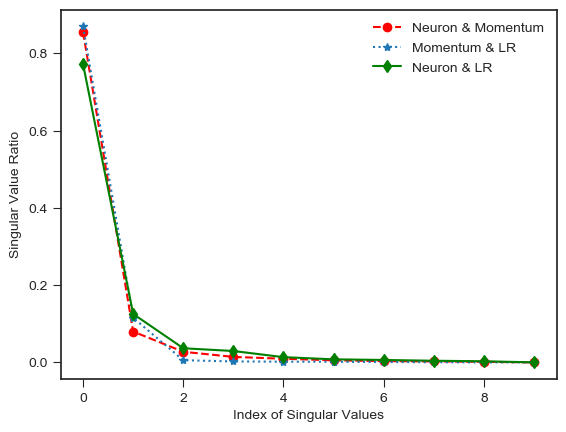

In [45]:
_, s_nm, _ = np.linalg.svd(score_neuron_mom, full_matrices=True)
_, s_ml, _ = np.linalg.svd(score_mom_lr, full_matrices=True)
_, s_nl, _ = np.linalg.svd(score_neuron_lr, full_matrices=True)
plt.plot(calc_percentage(s_nm),color = "red",marker='o', linestyle='dashed')
plt.plot(calc_percentage(s_ml),marker='*', linestyle='dotted')
plt.plot(calc_percentage(s_nl),color = "green",marker='d')
plt.xlabel("Index of Singular Values")
plt.ylabel("Singular Value Ratio")
plt.legend(['Neuron & Momentum','Momentum & LR','Neuron & LR'], loc='upper right')
plt.savefig("svd_score_mnist.png")

# Experiment 2: Sparsity vs TOP3, 5, 10 accuracy

In [122]:
# try it on second matrix (score_neuron_lr)
sparsity_levels = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
top_1_idx = find_top_k(score_neuron_lr,1)
top_3_idxs = find_top_k(score_neuron_lr,3)
top_5_idxs = find_top_k(score_neuron_lr,5)
top_10_idxs = find_top_k(score_neuron_lr,10)
top_1,top_3,top_5,top_10 = [],[],[],[]
for sparsity in sparsity_levels:
#     print("Current Sparsity Level: "+str(sparsity))
    running_1,running_3,running_5,running_10 = 0,0,0,0
    for i in range(100):
        score_sparse = generate_sparse_score_two_way(score_neuron_lr,sparsity)
        rec_score = calculate_rec_score(score_sparse)
        
        mask = np.zeros_like(score_sparse)
        mask[score_sparse > 0] = 1
        rec_score[mask > 0] = 0
        rec_score = score_sparse + rec_score

        rec_top_idx = find_top_k(rec_score,1)[0]
        running_1 += check_top(rec_top_idx,top_1_idx)
        running_3 += check_top(rec_top_idx,top_3_idxs)
        running_5 += check_top(rec_top_idx,top_5_idxs)
        running_10 += check_top(rec_top_idx,top_10_idxs)
    top_1.append(running_1*1.0/100)
    top_3.append(running_3*1.0/100)
    top_5.append(running_5*1.0/100)
    top_10.append(running_10*1.0/100)

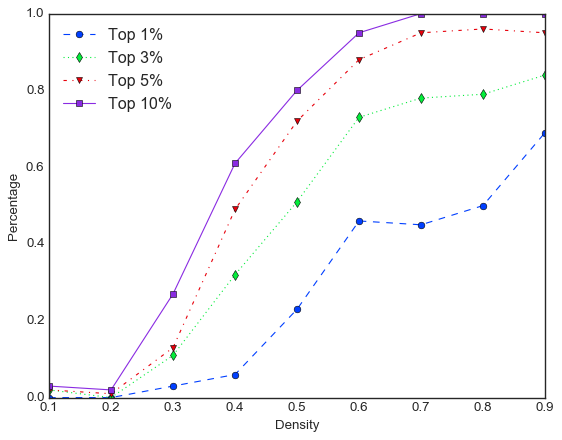

In [118]:
# neuron and momentum
plt.plot(sparsity_levels,top_1,marker = 'o',linestyle = 'dashed')
plt.plot(sparsity_levels,top_3,marker = 'd',linestyle = 'dotted')
plt.plot(sparsity_levels,top_5,marker = 'v',linestyle = 'dashdot')
plt.plot(sparsity_levels,top_10,marker = 's',linestyle = 'solid')

plt.xlabel("Density")
plt.ylabel("Percentage")

plt.legend(['Top 1%','Top 3%','Top 5%','Top 10%'], loc='upper left')
plt.savefig("mat_nm_exp_2_top.png")

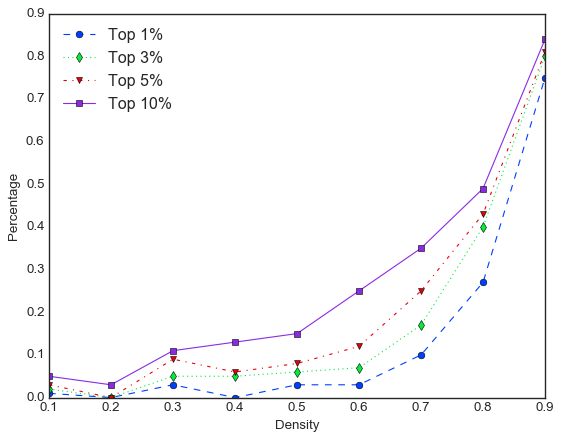

In [121]:
# momentum and learn rate
plt.plot(sparsity_levels,top_1,marker = 'o',linestyle = 'dashed')
plt.plot(sparsity_levels,top_3,marker = 'd',linestyle = 'dotted')
plt.plot(sparsity_levels,top_5,marker = 'v',linestyle = 'dashdot')
plt.plot(sparsity_levels,top_10,marker = 's',linestyle = 'solid')

plt.xlabel("Density")
plt.ylabel("Percentage")

plt.legend(['Top 1%','Top 3%','Top 5%','Top 10%'], loc='upper left')
plt.savefig("mat_ml_exp_2_top.png")

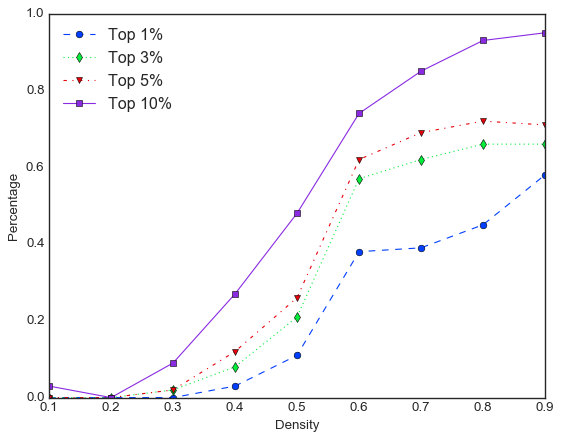

In [124]:
# neuron and learn rate
plt.plot(sparsity_levels,top_1,marker = 'o',linestyle = 'dashed')
plt.plot(sparsity_levels,top_3,marker = 'd',linestyle = 'dotted')
plt.plot(sparsity_levels,top_5,marker = 'v',linestyle = 'dashdot')
plt.plot(sparsity_levels,top_10,marker = 's',linestyle = 'solid')

plt.xlabel("Density")
plt.ylabel("Percentage")

plt.legend(['Top 1%','Top 3%','Top 5%','Top 10%'], loc='upper left')
plt.savefig("mat_nl_exp_2_top.png")

In [125]:
# try it on tensor(score)
sparsity_levels = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
top_1_idx = find_top_k(score,1)
top_3_idxs = find_top_k(score,3)
top_5_idxs = find_top_k(score,5)
top_10_idxs = find_top_k(score,10)
top_1,top_3,top_5,top_10 = [],[],[],[]
for sparsity in sparsity_levels:
    running_1,running_3,running_5,running_10 = 0,0,0,0
    for i in range(100):
        score_sparse = generate_sparse_score_three_way(score,sparsity)
        rec_score = calculate_rec_score(score_sparse)
        
        mask = np.zeros_like(score_sparse)
        mask[score_sparse > 0] = 1
        rec_score[mask > 0] = 0
        rec_score = score_sparse + rec_score
        
        rec_top_idx = find_top_k(rec_score,1)[0]
        running_1 += check_top(rec_top_idx,top_1_idx)
        running_3 += check_top(rec_top_idx,top_3_idxs)
        running_5 += check_top(rec_top_idx,top_5_idxs)
        running_10 += check_top(rec_top_idx,top_10_idxs)
    top_1.append(running_1*1.0/100)
    top_3.append(running_3*1.0/100)
    top_5.append(running_5*1.0/100)
    top_10.append(running_10*1.0/100)

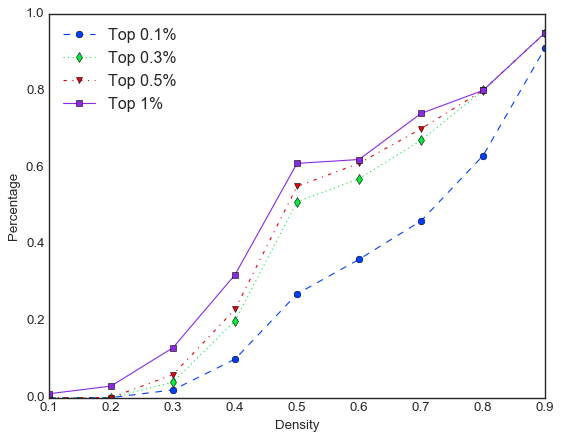

In [127]:
plt.plot(sparsity_levels,top_1,marker = 'o',linestyle = 'dashed')
plt.plot(sparsity_levels,top_3,marker = 'd',linestyle = 'dotted')
plt.plot(sparsity_levels,top_5,marker = 'v',linestyle = 'dashdot')
plt.plot(sparsity_levels,top_10,marker = 's',linestyle = 'solid')

plt.xlabel("Density")
plt.ylabel("Percentage")

plt.legend(['Top 0.1%','Top 0.3%','Top 0.5%','Top 1%'], loc='upper left')
plt.savefig("tensor_exp_2_top.png")

# Experiment 3

In [5]:
# Load rand search results 
configs_random_nm = np.load("random_search_configs/configs_random_nm.npy",allow_pickle = True)
configs_random_nl = np.load("random_search_configs/configs_random_nl.npy",allow_pickle = True)
configs_random_ml = np.load("random_search_configs/configs_random_ml.npy",allow_pickle = True)
configs_random_tensor = np.load("random_search_configs/configs_random_tensor.npy",allow_pickle = True)

random_acc_nl = np.load("random_acc_nl.npy",allow_pickle = True)
rec_acc_nl = np.load("rec_acc_nl.npy", allow_pickle = True)

random_acc_ml = np.load("random_acc_ml.npy",allow_pickle = True)
rec_acc_ml = np.load("rec_acc_ml.npy", allow_pickle = True)

random_acc_nm = np.load("random_acc_nm.npy",allow_pickle = True)
rec_acc_nm = np.load("rec_acc_nm.npy", allow_pickle = True)

random_acc_tensor = np.load("random_acc_tensor.npy",allow_pickle = True)
rec_acc_tensor = np.load("rec_acc_tensor.npy", allow_pickle = True)

samples_set = np.arange(10,101,5)

In [94]:
# Learn Rate & Neurons
random_acc_nl = []
samples_set = np.arange(10,101,5)
for sample in samples_set:
    random_acc = []
#     print("Staring experiment with sample size = {}".format(sample))
    for i in range(5):
        sampled_configs = configs_random_nl[sorted(random.sample(range(len(configs_random_nl)), sample))]
        best_acc_tr,best_acc_idx = 0,0
        for i in range(len(sampled_configs)):
            best_acc_tr = sampled_configs[i]["acc_tr"] if sampled_configs[i]["acc_tr"] > best_acc_tr else best_acc_tr
            best_acc_idx = i if sampled_configs[i]["acc_tr"] > best_acc_tr else best_acc_idx
        random_acc.append(sampled_configs[best_acc_idx]["acc_te"])
    random_acc_nl.append(random_acc)
#     print("Completed experiment with sample size = {}".format(sample))

In [20]:
# 10*10  grid, compare with random search
rec_acc_nl = []

for sample in samples_set:
    rec_acc = []
    print("Staring experiment with sample size = {}".format(sample))
    for i in range(5):
        score_sparse = generate_sparse_score_two_way(score_neuron_lr,sample,False)
        rec_score = calculate_rec_score(score_sparse)
        mask = np.zeros_like(score_sparse)
        mask[score_sparse > 0] = 1
        rec_score[mask > 0] = 0
        rec_score = score_sparse + rec_score
        rec_neur_idx,rec_lr_idx = find_top_k(rec_score,1)[0]
        model,_ = train_model(Xs_tr,Ys_tr,10,learn_rates[rec_lr_idx], neurons[rec_neur_idx], 0.9)
        _,acc = model.evaluate(Xs_te, Ys_te, verbose=0)
        rec_acc.append(acc)
    print("Completed experiment with sample size = {}".format(sample))
    rec_acc_nl.append(rec_acc)
rec_acc_nl = np.array(rec_acc_nl)
# np.save("rec_acc_nl_sample_"+str(sample),np.array(rec_acc))

Staring experiment with sample size = 10
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 30us/sample - loss: 0.3918 - accuracy: 0.8874
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 0.2860 - accuracy: 0.9204
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 30us/sample - loss: 1.5114 - accuracy: 0.4327
Epoch 2/2
60000/60000 [==============================] - 2s 26us/sample - loss: 1.4376 - accuracy: 0.4584
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.3858 - accuracy: 0.8862
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 0.2898 - accuracy: 0.9172
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 33us/sample - loss: 0.2405 - accuracy: 0.9263
Epoch 2/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.1299 - accuracy: 0.9603
Train on 60000 samp

60000/60000 [==============================] - 2s 28us/sample - loss: 0.1129 - accuracy: 0.9652
Completed experiment with sample size = 70
Staring experiment with sample size = 75
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 30us/sample - loss: 0.2327 - accuracy: 0.9299
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1060 - accuracy: 0.9669
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.2486 - accuracy: 0.9256
Epoch 2/2
60000/60000 [==============================] - 2s 26us/sample - loss: 0.1164 - accuracy: 0.9643
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.2547 - accuracy: 0.9242
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 0.1128 - accuracy: 0.9661
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.2469 - acc

In [128]:
#grid_search 
grid_neur_idx,grid_lr_idx = find_top_k(score_neuron_lr,1)[0]
model,_ = train_model(Xs_tr,Ys_tr,10,learn_rates[grid_lr_idx], neurons[grid_neur_idx], 0.9)
_,acc = model.evaluate(Xs_te, Ys_te, verbose=0)
acc

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 4s 73us/sample - loss: 0.2541 - accuracy: 0.9236
Epoch 2/2
60000/60000 [==============================] - 3s 58us/sample - loss: 0.1174 - accuracy: 0.9648


0.9684

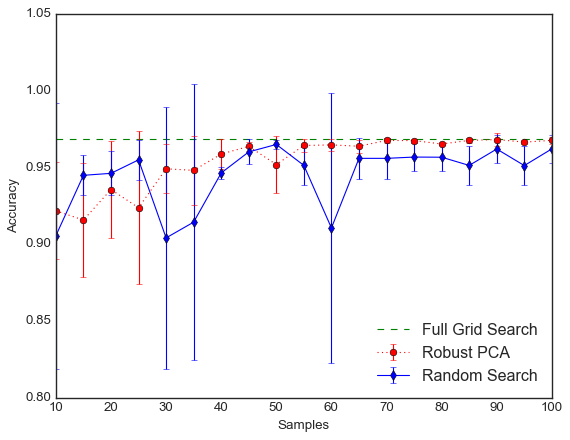

In [150]:
plt.hlines(acc,xmin=10,xmax=100, color="green",linestyle = "dashed")
plt.errorbar(samples_set,np.mean(rec_acc_nl,axis=1),rec_acc_nl.std(1),marker='o',color="red",  linestyle='dotted')
plt.errorbar(samples_set,np.mean(random_acc_nl,axis=1),random_acc_nl.std(1),marker='d',color="blue")
plt.legend(['Full Grid Search','Robust PCA','Random Search'],loc='lower right')
plt.xlabel("Samples")
plt.ylabel("Accuracy")
plt.savefig("sample_vs_acc_nl.png")

In [40]:
# Momentum & Learn Rate
rec_acc_ml = []
samples_set = np.arange(10,101,5)
for sample in samples_set:
    rec_acc = []
    print("Staring experiment with sample size = {}".format(sample))
    for i in range(5):
        score_sparse = generate_sparse_score_two_way(score_mom_lr,sample,False)
        rec_score = calculate_rec_score(score_sparse)
        mask = np.zeros_like(score_sparse)
        mask[score_sparse > 0] = 1
        rec_score[mask > 0] = 0
        rec_score = score_sparse + rec_score
        rec_mom_idx,rec_lr_idx = find_top_k(rec_score,1)[0]
        model,_ = train_model(Xs_tr,Ys_tr,10,learn_rates[rec_lr_idx], 50, momenta[rec_mom_idx],num_epoch = 2)
        _,acc = model.evaluate(Xs_te, Ys_te, verbose=0)
        rec_acc.append(acc)
    print("Completed experiment with sample size = {}".format(sample))
    rec_acc_ml.append(rec_acc)
rec_acc_ml = np.array(rec_acc_ml)
# np.save("rec_acc_nl_sample_"+str(sample),np.array(rec_acc))

Staring experiment with sample size = 10
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 32us/sample - loss: 1.7441 - accuracy: 0.5313
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.9738 - accuracy: 0.7782
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 30us/sample - loss: 0.3946 - accuracy: 0.8892
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 0.2241 - accuracy: 0.9358
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.4270 - accuracy: 0.8827
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.2422 - accuracy: 0.9318
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.3169 - accuracy: 0.9089
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1655 - accuracy: 0.9514
Train on 60000 samp

Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1573 - accuracy: 0.9536
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.2665 - accuracy: 0.9210
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1333 - accuracy: 0.9599
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.2888 - accuracy: 0.9154
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1448 - accuracy: 0.9569
Completed experiment with sample size = 40
Staring experiment with sample size = 45
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.3073 - accuracy: 0.9110
Epoch 2/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.1584 - accuracy: 0.9535
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.2761 - accuracy: 0.9178
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1391 - accuracy: 0.9582
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.2650 - accuracy: 0.9215
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1301 - accuracy: 0.9609
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.2724 - accuracy: 0.9190
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1376 - accuracy: 0.9592
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.2582 - accuracy: 0.9240
Epoch 2/2
60000/60000 [==============================] - 2s 30us/sample - loss: 0.1347 - accuracy: 0.9596
Train on 60000 samples
Epoch 1/2
60000/60000 [==============

In [41]:
random_acc_ml = []
for sample in samples_set:
    random_acc = []
#     print("Staring experiment with sample size = {}".format(sample))
    for i in range(5):
        sampled_configs = configs_random_ml[sorted(random.sample(range(len(configs_random_ml)), sample))]
        best_acc_tr,best_acc_idx = 0,0
        for i in range(len(sampled_configs)):
            best_acc_tr = sampled_configs[i]["acc_tr"] if sampled_configs[i]["acc_tr"] > best_acc_tr else best_acc_tr
            best_acc_idx = i if sampled_configs[i]["acc_tr"] > best_acc_tr else best_acc_idx
        random_acc.append(sampled_configs[best_acc_idx]["acc_te"])
    random_acc_ml.append(random_acc)
random_acc_ml = np.array(random_acc_ml)
#     print("Completed experiment with sample size = {}".format(sample))

In [151]:
#grid_search 
grid_mom_idx,grid_lr_idx = find_top_k(score_mom_lr,1)[0]
model,_ = train_model(Xs_tr,Ys_tr,10,learn_rates[grid_lr_idx], 50, momenta[grid_mom_idx])
_,acc = model.evaluate(Xs_te, Ys_te, verbose=0)
acc

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 5s 76us/sample - loss: 0.2561 - accuracy: 0.9232
Epoch 2/2
60000/60000 [==============================] - 4s 62us/sample - loss: 0.1294 - accuracy: 0.9617


0.966

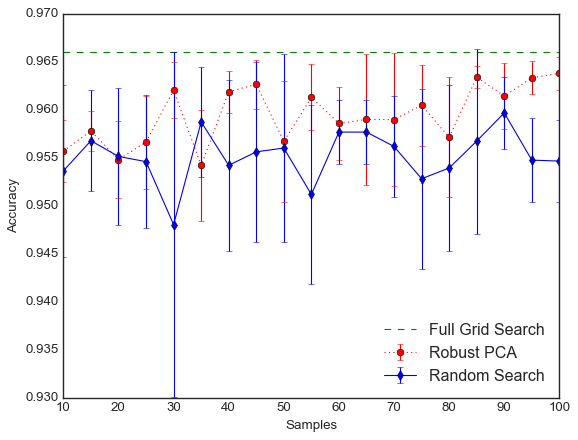

In [156]:
plt.hlines(acc,xmin=10,xmax=100, color="green",linestyle = "dashed")
plt.errorbar(samples_set,np.mean(rec_acc_ml,axis=1),rec_acc_ml.std(1),marker='o',color="red",  linestyle='dotted')
plt.errorbar(samples_set,np.mean(random_acc_ml,axis=1),random_acc_ml.std(1),marker='d',color="blue")
plt.legend(['Full Grid Search','Robust PCA','Random Search'],loc='lower right')
plt.xlabel("Samples")
plt.ylabel("Accuracy")
plt.savefig("sample_vs_acc_ml.png")

In [70]:
#  Neuron & Momentum
rec_acc_nm = []
samples_set = np.arange(10,101,5)
for sample in samples_set:
    rec_acc = []
    print("Staring experiment with sample size = {}".format(sample))
    for i in range(5):
        score_sparse = generate_sparse_score_two_way(score_neuron_mom,sample,False)
        rec_score = calculate_rec_score(score_sparse)
        mask = np.zeros_like(score_sparse)
        mask[score_sparse > 0] = 1
        rec_score[mask > 0] = 0
        rec_score = score_sparse + rec_score
        rec_neur_idx,rec_mom_idx = find_top_k(rec_score,1)[0]
        model,_ = train_model(Xs_tr,Ys_tr,10,0.001, neurons[rec_neur_idx], momenta[rec_mom_idx])
        _,acc = model.evaluate(Xs_te, Ys_te, verbose=0)
        rec_acc.append(acc)
    print("Completed experiment with sample size = {}".format(sample))
    rec_acc_nm.append(rec_acc)
rec_acc_nm = np.array(rec_acc_nm)
# np.save("rec_acc_nl_sample_"+str(sample),np.array(rec_acc))

Staring experiment with sample size = 10
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 30us/sample - loss: 1.3721 - accuracy: 0.6109
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 0.6160 - accuracy: 0.8481
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 28us/sample - loss: 2.2740 - accuracy: 0.1410
Epoch 2/2
60000/60000 [==============================] - 2s 26us/sample - loss: 2.0776 - accuracy: 0.3179
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 30us/sample - loss: 0.9186 - accuracy: 0.7427
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 0.3984 - accuracy: 0.8889
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 1.4542 - accuracy: 0.6324
Epoch 2/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.6815 - accuracy: 0.8431
Train on 60000 samp

Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 0.3580 - accuracy: 0.8990
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.7549 - accuracy: 0.7976
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.3662 - accuracy: 0.8981
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.9386 - accuracy: 0.7722
Epoch 2/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.4371 - accuracy: 0.8856
Completed experiment with sample size = 40
Staring experiment with sample size = 45
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 33us/sample - loss: 0.9742 - accuracy: 0.7581
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.4431 - accuracy: 0.8848
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 41us/sample - loss: 1.

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 40us/sample - loss: 0.6916 - accuracy: 0.8237
Epoch 2/2
60000/60000 [==============================] - 2s 38us/sample - loss: 0.3525 - accuracy: 0.9008
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 3s 50us/sample - loss: 0.7026 - accuracy: 0.8223
Epoch 2/2
60000/60000 [==============================] - 2s 32us/sample - loss: 0.3533 - accuracy: 0.9020
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 34us/sample - loss: 0.7148 - accuracy: 0.8181
Epoch 2/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.3595 - accuracy: 0.9011
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 36us/sample - loss: 0.7118 - accuracy: 0.8215
Epoch 2/2
60000/60000 [==============================] - 2s 33us/sample - loss: 0.3485 - accuracy: 0.9038
Train on 60000 samples
Epoch 1/2
60000/60000 [==============

In [71]:
random_acc_nm = []
for sample in samples_set:
    random_acc = []
#     print("Staring experiment with sample size = {}".format(sample))
    for i in range(5):
        sampled_configs = configs_random_nm[sorted(random.sample(range(len(configs_random_nm)), sample))]
        best_acc_tr,best_acc_idx = 0,0
        for i in range(len(sampled_configs)):
            best_acc_tr = sampled_configs[i]["acc_tr"] if sampled_configs[i]["acc_tr"] > best_acc_tr else best_acc_tr
            best_acc_idx = i if sampled_configs[i]["acc_tr"] > best_acc_tr else best_acc_idx
        random_acc.append(sampled_configs[best_acc_idx]["acc_te"])
    random_acc_nm.append(random_acc)
random_acc_nm = np.array(random_acc_nm)
#     print("Completed experiment with sample size = {}".format(sample))

In [160]:
#grid search
grid_neur_idx,grid_mom_idx = find_top_k(score_neuron_mom,1)[0]
model,_ = train_model(Xs_tr,Ys_tr,10,0.001, neurons[grid_neur_idx], momenta[grid_mom_idx])
_,acc = model.evaluate(Xs_te, Ys_te, verbose=0)
acc

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 4s 64us/sample - loss: 0.7192 - accuracy: 0.8171
Epoch 2/2
60000/60000 [==============================] - 4s 61us/sample - loss: 0.3521 - accuracy: 0.9017


0.9149

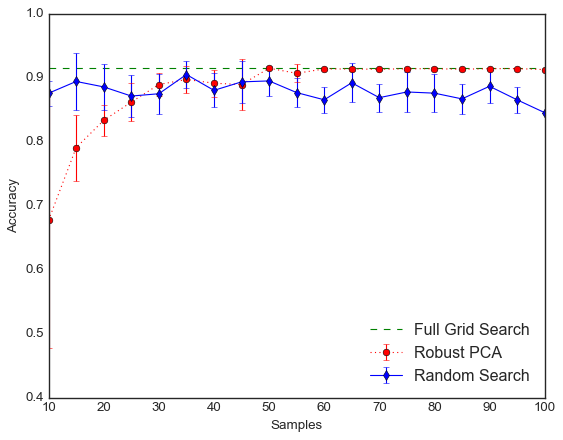

In [162]:
plt.hlines(acc,xmin=10,xmax=100, color="green",linestyle = "dashed")
plt.errorbar(samples_set,np.mean(rec_acc_nm,axis=1),rec_acc_nm.std(1),marker='o',color="red",  linestyle='dotted')
plt.errorbar(samples_set,np.mean(random_acc_nm,axis=1),random_acc_nm.std(1),marker='d',color="blue")
plt.legend(['Full Grid Search','Robust PCA','Random Search'],loc='lower right')
plt.xlabel("Samples")
plt.ylabel("Accuracy")
plt.savefig("sample_vs_acc_nm.png")

In [98]:
# Tensor
rec_acc_tensor = []
samples_set = np.arange(100,1001,50)
for sample in samples_set:
    rec_acc = []
    print("Staring experiment with sample size = {}".format(sample))
    for i in range(5):
        score_sparse = generate_sparse_score_three_way(score,sample,False)
        rec_score = calculate_rec_score(score_sparse)
        mask = np.zeros_like(score_sparse)
        mask[score_sparse > 0] = 1
        rec_score[mask > 0] = 0
        rec_score = score_sparse + rec_score
        rec_lr_idx, rec_neur_idx,rec_mom_idx = find_top_k(rec_score,1)[0]
        model,_ = train_model(Xs_tr,Ys_tr,10,learn_rates[rec_lr_idx], neurons[rec_neur_idx], momenta[rec_mom_idx])
        
#         loss_tr,acc_tr = model.evaluate(Xs_tr, Ys_tr, verbose=0)
#         if loss_tr > 
        loss,acc = model.evaluate(Xs_te, Ys_te, verbose=0)
        
        rec_acc.append(acc)
    print("Completed experiment with sample size = {}".format(sample))
    rec_acc_tensor.append(rec_acc)
rec_acc_tensor = np.array(rec_acc_tensor)
# np.save("rec_acc_nl_sample_"+str(sample),np.array(rec_acc))

Staring experiment with sample size = 100
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.2687 - accuracy: 0.9183
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1464 - accuracy: 0.9567
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 1.2118 - accuracy: 0.6989
Epoch 2/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.5532 - accuracy: 0.8592
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 1.4798 - accuracy: 0.6275
Epoch 2/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.7512 - accuracy: 0.8315
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 32us/sample - loss: 3.2329 - accuracy: 0.1445
Epoch 2/2
60000/60000 [==============================] - 2s 29us/sample - loss: 3.8201 - accuracy: 0.1009
Train on 60000 sam

60000/60000 [==============================] - 2s 29us/sample - loss: 0.1063 - accuracy: 0.9680
Completed experiment with sample size = 700
Staring experiment with sample size = 750
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 32us/sample - loss: 0.2351 - accuracy: 0.9284
Epoch 2/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.1083 - accuracy: 0.9673
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 32us/sample - loss: 0.2326 - accuracy: 0.9316
Epoch 2/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.1050 - accuracy: 0.9686
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 32us/sample - loss: 0.2355 - accuracy: 0.9296
Epoch 2/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.1074 - accuracy: 0.9678
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 32us/sample - loss: 0.2312 - a

In [102]:
random_acc_tensor = []
for sample in samples_set:
    random_acc = []
    for i in range(5):
        sampled_configs = configs_random_tensor[sorted(random.sample(range(len(configs_random_tensor)), sample))]
        best_acc_tr,best_acc_idx = 0,0
        for i in range(len(sampled_configs)):
            best_acc_tr = sampled_configs[i]["acc_tr"] if sampled_configs[i]["acc_tr"] > best_acc_tr else best_acc_tr
            best_acc_idx = i if sampled_configs[i]["acc_tr"] > best_acc_tr else best_acc_idx
        random_acc.append(sampled_configs[best_acc_idx]["acc_te"])
    random_acc_tensor.append(random_acc)
random_acc_tensor = np.array(random_acc_tensor)

In [163]:
#grid search
grid_lr_idx, grid_neur_idx,grid_mom_idx = find_top_k(score,1)[0]
model,_ = train_model(Xs_tr,Ys_tr,10,learn_rates[grid_lr_idx], neurons[grid_neur_idx], momenta[grid_mom_idx])
_,acc = model.evaluate(Xs_te, Ys_te, verbose=0)
acc

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 4s 65us/sample - loss: 0.2333 - accuracy: 0.9303
Epoch 2/2
60000/60000 [==============================] - 4s 60us/sample - loss: 0.1076 - accuracy: 0.9671


0.9687

In [6]:
samples_set = np.arange(100,1001,50)

In [28]:
plt.style.use("seaborn-white")

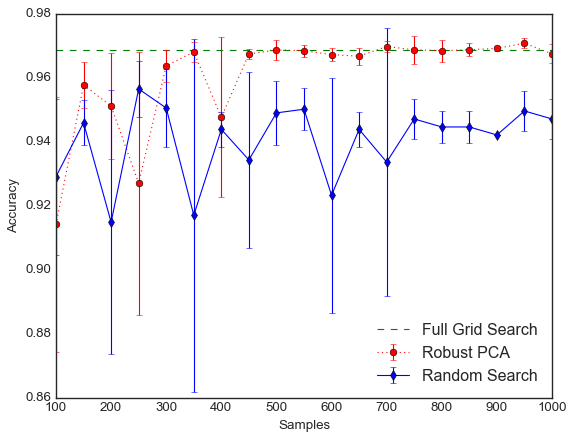

In [30]:
plt.hlines(0.9687,xmin=100,xmax=1000, color="green",linestyle = "dashed")
plt.errorbar(samples_set,np.mean(rec_acc_tensor,axis=1),rec_acc_tensor.std(1),marker='o',color="red",  linestyle='dotted')
plt.errorbar(samples_set,np.mean(random_acc_tensor,axis=1),random_acc_tensor.std(1),marker='d',color="blue")
plt.legend(['Full Grid Search','Robust PCA','Random Search'],loc='lower right')
plt.xlabel("Samples")
plt.ylabel("Accuracy")
plt.savefig("sample_vs_acc_tensor.png")

# These Parts Generate Random Search Samples

In [7]:
# 1200 Random Configurations for Tensor
hp_names = ["learning_rate","momentum","num_neuron"]
hp_min_vals = [0.001,0,5]
hp_max_vals = [0.1,1.0,100]
hp_is_discrete_set = [False,False,True]

random_acc_1200 = []
for j in range(1200):
    random_config = random_search(hp_names,hp_min_vals,hp_max_vals,hp_is_discrete_set)
    print("Try random Config:{}".format(random_config))
    model, _ = train_model(Xs_tr,Ys_tr,10,random_config["learning_rate"], random_config["num_neuron"], random_config["momentum"])
    _,acc_tr = model.evaluate(Xs_tr, Ys_tr, verbose=0)
    _,acc_te = model.evaluate(Xs_te, Ys_te, verbose=0)
    random_config["acc_tr"] = acc_tr
    random_config["acc_te"] = acc_te
    random_acc_1200.append(random_config)
    


Try random Config:{'learning_rate': 0.07810387269223251, 'momentum': 0.4035945935893229, 'num_neuron': 22.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.3381 - accuracy: 0.9020
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 0.2070 - accuracy: 0.9399
Try random Config:{'learning_rate': 0.07976705379121192, 'momentum': 0.38415514247094673, 'num_neuron': 25.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 30us/sample - loss: 0.3253 - accuracy: 0.9053
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 0.1824 - accuracy: 0.9460
Try random Config:{'learning_rate': 0.03039481543053677, 'momentum': 0.09463744547615993, 'num_neuron': 93.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 32us/sample - loss: 0.4261 - accuracy: 0.8826
Epoch 2/2
60000/60000 [==============================] - 2s 30us/sample 

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 32us/sample - loss: 0.2953 - accuracy: 0.9142
Epoch 2/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.1437 - accuracy: 0.9585
Try random Config:{'learning_rate': 0.08289749493205517, 'momentum': 0.7179270017918766, 'num_neuron': 92.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 34us/sample - loss: 0.2260 - accuracy: 0.9316
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1043 - accuracy: 0.9683
Try random Config:{'learning_rate': 0.0609571962114462, 'momentum': 0.1109773552445602, 'num_neuron': 75.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.3449 - accuracy: 0.9036
Epoch 2/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.1818 - accuracy: 0.9471
Try random Config:{'learning_rate': 0.08996063218903157, 'momentum': 0.7166553

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.3325 - accuracy: 0.9031
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1738 - accuracy: 0.9496
Try random Config:{'learning_rate': 0.0391275908361689, 'momentum': 0.788257149441183, 'num_neuron': 17.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 34us/sample - loss: 0.3463 - accuracy: 0.8965
Epoch 2/2
60000/60000 [==============================] - 2s 26us/sample - loss: 0.2257 - accuracy: 0.9339
Try random Config:{'learning_rate': 0.008311901134482972, 'momentum': 0.423352221887648, 'num_neuron': 63.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 30us/sample - loss: 0.5945 - accuracy: 0.8448
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.3135 - accuracy: 0.9108
Try random Config:{'learning_rate': 0.013667654586925922, 'momentum': 0.0958456

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 30us/sample - loss: 0.6429 - accuracy: 0.8318
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.3270 - accuracy: 0.9083
Try random Config:{'learning_rate': 0.0001426549359654546, 'momentum': 0.99172178929943, 'num_neuron': 61.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.6324 - accuracy: 0.8186
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 0.3093 - accuracy: 0.9115
Try random Config:{'learning_rate': 0.09365358201195385, 'momentum': 0.30830782944160195, 'num_neuron': 95.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 32us/sample - loss: 0.2776 - accuracy: 0.9187
Epoch 2/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.1329 - accuracy: 0.9612
Try random Config:{'learning_rate': 0.07365514401169708, 'momentum': 0.34839

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 36us/sample - loss: 0.6511 - accuracy: 0.8033
Epoch 2/2
60000/60000 [==============================] - 2s 26us/sample - loss: 0.3861 - accuracy: 0.8895
Try random Config:{'learning_rate': 0.017991448648457597, 'momentum': 0.29511409959856283, 'num_neuron': 51.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 32us/sample - loss: 0.4762 - accuracy: 0.8724
Epoch 2/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.2795 - accuracy: 0.9212
Try random Config:{'learning_rate': 0.03041954062832536, 'momentum': 0.4193597784804224, 'num_neuron': 99.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 32us/sample - loss: 0.3729 - accuracy: 0.8976
Epoch 2/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.2016 - accuracy: 0.9424
Try random Config:{'learning_rate': 0.05420615924285807, 'momentum': 0.4209

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.3457 - accuracy: 0.9014
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1897 - accuracy: 0.9452
Try random Config:{'learning_rate': 0.08822635292068377, 'momentum': 0.38094907119204025, 'num_neuron': 36.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 30us/sample - loss: 0.3129 - accuracy: 0.9083
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1680 - accuracy: 0.9504
Try random Config:{'learning_rate': 0.048042572674323755, 'momentum': 0.26174150796404294, 'num_neuron': 38.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.3674 - accuracy: 0.8961
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.2110 - accuracy: 0.9385
Try random Config:{'learning_rate': 0.08163775389819193, 'momentum': 0.532

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 30us/sample - loss: 0.2928 - accuracy: 0.9154
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1412 - accuracy: 0.9593
Try random Config:{'learning_rate': 0.02435002408889373, 'momentum': 0.6924435262666369, 'num_neuron': 31.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.3723 - accuracy: 0.8933
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.2057 - accuracy: 0.9407
Try random Config:{'learning_rate': 0.0693583717177776, 'momentum': 0.4165672644572743, 'num_neuron': 45.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.3005 - accuracy: 0.9131
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1538 - accuracy: 0.9556
Try random Config:{'learning_rate': 0.07139156972859569, 'momentum': 0.7728646

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 30us/sample - loss: 0.3509 - accuracy: 0.8949
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 0.2280 - accuracy: 0.9336
Try random Config:{'learning_rate': 0.0892071364016077, 'momentum': 0.27255084836264654, 'num_neuron': 73.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.2931 - accuracy: 0.9148
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1398 - accuracy: 0.9593
Try random Config:{'learning_rate': 0.014797952043304422, 'momentum': 0.8388957719172497, 'num_neuron': 28.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 30us/sample - loss: 0.3574 - accuracy: 0.8961
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 0.2037 - accuracy: 0.9409
Try random Config:{'learning_rate': 0.031325924460530966, 'momentum': 0.6666

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.2782 - accuracy: 0.9188
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1352 - accuracy: 0.9603
Try random Config:{'learning_rate': 0.012111307220204308, 'momentum': 0.8822542723797362, 'num_neuron': 36.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.3297 - accuracy: 0.9046
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1780 - accuracy: 0.9486
Try random Config:{'learning_rate': 0.002242023051733811, 'momentum': 0.6005181009533687, 'num_neuron': 65.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.8407 - accuracy: 0.7933
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.4062 - accuracy: 0.8899
Try random Config:{'learning_rate': 0.07304811540403006, 'momentum': 0.0041

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.4746 - accuracy: 0.8571
Epoch 2/2
60000/60000 [==============================] - 2s 26us/sample - loss: 0.3400 - accuracy: 0.8999
Try random Config:{'learning_rate': 0.007398822883098419, 'momentum': 0.2804073197086122, 'num_neuron': 57.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.7210 - accuracy: 0.8131
Epoch 2/2
60000/60000 [==============================] - 2s 26us/sample - loss: 0.3432 - accuracy: 0.9032
Try random Config:{'learning_rate': 0.055871476342009396, 'momentum': 0.9141161624923382, 'num_neuron': 73.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.2495 - accuracy: 0.9247
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1370 - accuracy: 0.9585
Try random Config:{'learning_rate': 0.052563412777331606, 'momentum': 0.649

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.4883 - accuracy: 0.8706
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.2760 - accuracy: 0.9210
Try random Config:{'learning_rate': 0.09359275570379735, 'momentum': 0.5020938436894089, 'num_neuron': 55.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.2750 - accuracy: 0.9173
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 0.1362 - accuracy: 0.9585
Try random Config:{'learning_rate': 0.04245916857716251, 'momentum': 0.8456132777640996, 'num_neuron': 57.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.2574 - accuracy: 0.9231
Epoch 2/2
60000/60000 [==============================] - 2s 26us/sample - loss: 0.1289 - accuracy: 0.9616
Try random Config:{'learning_rate': 0.025550379421878735, 'momentum': 0.62919

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 28us/sample - loss: 1.7973 - accuracy: 0.3899
Epoch 2/2
60000/60000 [==============================] - 2s 26us/sample - loss: 1.2582 - accuracy: 0.5997
Try random Config:{'learning_rate': 0.04967815396947462, 'momentum': 0.16623422381097352, 'num_neuron': 65.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 30us/sample - loss: 0.3626 - accuracy: 0.8992
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1995 - accuracy: 0.9435
Try random Config:{'learning_rate': 0.08043836463269109, 'momentum': 0.1749553815959639, 'num_neuron': 12.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.4055 - accuracy: 0.8799
Epoch 2/2
60000/60000 [==============================] - 2s 26us/sample - loss: 0.2639 - accuracy: 0.9240
Try random Config:{'learning_rate': 0.03448163327363056, 'momentum': 0.42371

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 28us/sample - loss: 1.6376 - accuracy: 0.5447
Epoch 2/2
60000/60000 [==============================] - 2s 26us/sample - loss: 0.8107 - accuracy: 0.8125
Try random Config:{'learning_rate': 0.06614766230046336, 'momentum': 0.3804884519024151, 'num_neuron': 41.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.3257 - accuracy: 0.9069
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1732 - accuracy: 0.9496
Try random Config:{'learning_rate': 0.04864165298431621, 'momentum': 0.580040310219174, 'num_neuron': 72.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 3s 47us/sample - loss: 0.3003 - accuracy: 0.9134
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1471 - accuracy: 0.9566
Try random Config:{'learning_rate': 0.035802779789589755, 'momentum': 0.357229

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 29us/sample - loss: 1.2253 - accuracy: 0.6375
Epoch 2/2
60000/60000 [==============================] - 2s 26us/sample - loss: 0.5276 - accuracy: 0.8573
Try random Config:{'learning_rate': 0.07043928214716828, 'momentum': 0.09880351527574682, 'num_neuron': 30.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 30us/sample - loss: 0.3689 - accuracy: 0.8960
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.2138 - accuracy: 0.9394
Try random Config:{'learning_rate': 0.02871354038834822, 'momentum': 0.4403997118527946, 'num_neuron': 95.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.3693 - accuracy: 0.8964
Epoch 2/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.1988 - accuracy: 0.9430
Try random Config:{'learning_rate': 0.09987031630125405, 'momentum': 0.45842

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.2865 - accuracy: 0.9164
Epoch 2/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.1446 - accuracy: 0.9569
Try random Config:{'learning_rate': 0.01423820979814944, 'momentum': 0.779357075015941, 'num_neuron': 80.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 30us/sample - loss: 0.3493 - accuracy: 0.9024
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 0.1937 - accuracy: 0.9445
Try random Config:{'learning_rate': 0.06671696561421181, 'momentum': 0.9580841429404783, 'num_neuron': 98.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 32us/sample - loss: 0.4458 - accuracy: 0.8841
Epoch 2/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.3219 - accuracy: 0.9219
Try random Config:{'learning_rate': 0.06941132041061837, 'momentum': 0.5380262

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.3932 - accuracy: 0.8917
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.2207 - accuracy: 0.9368
Try random Config:{'learning_rate': 0.01840440934029545, 'momentum': 0.7275888162514267, 'num_neuron': 21.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 30us/sample - loss: 0.3800 - accuracy: 0.8913
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 0.2269 - accuracy: 0.9354
Try random Config:{'learning_rate': 0.07341004179352742, 'momentum': 0.8564472606217516, 'num_neuron': 89.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 30us/sample - loss: 0.2338 - accuracy: 0.9288
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1182 - accuracy: 0.9639
Try random Config:{'learning_rate': 0.08727391766510093, 'momentum': 0.762023

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 30us/sample - loss: 0.4080 - accuracy: 0.8854
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 0.2372 - accuracy: 0.9326
Try random Config:{'learning_rate': 0.05492742515587082, 'momentum': 0.3542174130076745, 'num_neuron': 10.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.4145 - accuracy: 0.8793
Epoch 2/2
60000/60000 [==============================] - 2s 26us/sample - loss: 0.2841 - accuracy: 0.9175
Try random Config:{'learning_rate': 0.02101708727110993, 'momentum': 0.39903808912073346, 'num_neuron': 14.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.5012 - accuracy: 0.8605s - loss: 0.5
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 0.3030 - accuracy: 0.9136
Try random Config:{'learning_rate': 0.009209385539433538, 'mome

60000/60000 [==============================] - 2s 31us/sample - loss: 0.2632 - accuracy: 0.9212
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1507 - accuracy: 0.9567
Try random Config:{'learning_rate': 0.07190672843622986, 'momentum': 0.7596475685099274, 'num_neuron': 47.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.2609 - accuracy: 0.9229
Epoch 2/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.1398 - accuracy: 0.9572
Try random Config:{'learning_rate': 0.07543425224649539, 'momentum': 0.28755944266271183, 'num_neuron': 69.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.3019 - accuracy: 0.9140
Epoch 2/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.1485 - accuracy: 0.9568
Try random Config:{'learning_rate': 0.014385210755381262, 'momentum': 0.14617227023749957, 'num_neuron': 18.0

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.4991 - accuracy: 0.8546
Epoch 2/2
60000/60000 [==============================] - 2s 26us/sample - loss: 0.3298 - accuracy: 0.9061
Try random Config:{'learning_rate': 0.07745268207458433, 'momentum': 0.3718480405236829, 'num_neuron': 80.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.2892 - accuracy: 0.9158
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1395 - accuracy: 0.9589
Try random Config:{'learning_rate': 0.0022270019549130594, 'momentum': 0.846469230939211, 'num_neuron': 92.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.5728 - accuracy: 0.8495
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.3076 - accuracy: 0.9132
Try random Config:{'learning_rate': 0.07532372117304699, 'momentum': 0.85202

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.4175 - accuracy: 0.8839
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.2358 - accuracy: 0.9326
Try random Config:{'learning_rate': 0.007148316251719024, 'momentum': 0.8211153712859691, 'num_neuron': 42.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 30us/sample - loss: 0.4223 - accuracy: 0.8828
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 0.2442 - accuracy: 0.9297
Try random Config:{'learning_rate': 0.03799541510558667, 'momentum': 0.7924829922493889, 'num_neuron': 78.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.2650 - accuracy: 0.9224
Epoch 2/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.1219 - accuracy: 0.9637
Try random Config:{'learning_rate': 0.0957442932167847, 'momentum': 0.425892

60000/60000 [==============================] - 2s 31us/sample - loss: 0.4992 - accuracy: 0.8680
Epoch 2/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.2799 - accuracy: 0.9207
Try random Config:{'learning_rate': 0.016011845053038452, 'momentum': 0.6329460993350665, 'num_neuron': 87.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.3949 - accuracy: 0.8912
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.2203 - accuracy: 0.9374
Try random Config:{'learning_rate': 0.08725748251001952, 'momentum': 0.5417776428234649, 'num_neuron': 57.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.2657 - accuracy: 0.9209
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 0.1328 - accuracy: 0.9608
Try random Config:{'learning_rate': 0.04018456034940035, 'momentum': 0.8101375178874246, 'num_neuron': 57.0}


Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 32us/sample - loss: 0.3476 - accuracy: 0.9000
Epoch 2/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.1836 - accuracy: 0.9460
Try random Config:{'learning_rate': 0.02268449259633144, 'momentum': 0.7391036378323294, 'num_neuron': 56.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.3379 - accuracy: 0.9036
Epoch 2/2
60000/60000 [==============================] - 2s 26us/sample - loss: 0.1795 - accuracy: 0.9483
Try random Config:{'learning_rate': 0.0235443144036212, 'momentum': 0.5615110223308013, 'num_neuron': 94.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.3695 - accuracy: 0.8961
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1997 - accuracy: 0.9427
Try random Config:{'learning_rate': 0.015353350653281264, 'momentum': 0.798935

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 30us/sample - loss: 0.3147 - accuracy: 0.9085
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 0.1648 - accuracy: 0.9527
Try random Config:{'learning_rate': 0.09281116003341458, 'momentum': 0.18417381522490583, 'num_neuron': 76.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.3036 - accuracy: 0.9128
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1517 - accuracy: 0.9558
Try random Config:{'learning_rate': 0.05808618603206645, 'momentum': 0.0416686490813688, 'num_neuron': 28.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.3847 - accuracy: 0.8909
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 0.2268 - accuracy: 0.9347
Try random Config:{'learning_rate': 0.08236460011382137, 'momentum': 0.83279

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.7763 - accuracy: 0.7598
Epoch 2/2
60000/60000 [==============================] - 2s 26us/sample - loss: 0.6220 - accuracy: 0.8161
Try random Config:{'learning_rate': 0.009145476481069986, 'momentum': 0.9404835935868971, 'num_neuron': 37.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.3381 - accuracy: 0.9006
Epoch 2/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.1748 - accuracy: 0.9492
Try random Config:{'learning_rate': 0.056401680659805775, 'momentum': 0.8143797921385192, 'num_neuron': 32.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 30us/sample - loss: 0.2849 - accuracy: 0.9154
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 0.1577 - accuracy: 0.9533
Try random Config:{'learning_rate': 0.010547767657347556, 'momentum': 0.278

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 30us/sample - loss: 0.2383 - accuracy: 0.9286
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 0.1258 - accuracy: 0.9619
Try random Config:{'learning_rate': 0.09650508779082713, 'momentum': 0.8167120168885429, 'num_neuron': 14.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 30us/sample - loss: 0.3828 - accuracy: 0.8863
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 0.2838 - accuracy: 0.9195
Try random Config:{'learning_rate': 0.020298320039636504, 'momentum': 0.816700135161824, 'num_neuron': 72.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.3109 - accuracy: 0.9097
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1571 - accuracy: 0.9542
Try random Config:{'learning_rate': 0.05799192424117324, 'momentum': 0.738291

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 30us/sample - loss: 0.5295 - accuracy: 0.8521
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 0.3043 - accuracy: 0.9130
Try random Config:{'learning_rate': 0.07889338741585306, 'momentum': 0.17530930036994619, 'num_neuron': 55.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 30us/sample - loss: 0.3233 - accuracy: 0.9062
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 0.1706 - accuracy: 0.9501
Try random Config:{'learning_rate': 0.04712451460527825, 'momentum': 0.7498109970938174, 'num_neuron': 64.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.2676 - accuracy: 0.9214
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 0.1297 - accuracy: 0.9619
Try random Config:{'learning_rate': 0.08454502678144571, 'momentum': 0.56703

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.6965 - accuracy: 0.8261
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 0.3578 - accuracy: 0.9004
Try random Config:{'learning_rate': 0.08495722346094264, 'momentum': 0.6332104757498974, 'num_neuron': 18.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.3376 - accuracy: 0.8986
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 0.2136 - accuracy: 0.9377
Try random Config:{'learning_rate': 0.05958273533254572, 'momentum': 0.0920460563127996, 'num_neuron': 66.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.3583 - accuracy: 0.8992
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1931 - accuracy: 0.9447
Try random Config:{'learning_rate': 0.01574607321460939, 'momentum': 0.626229

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 30us/sample - loss: 0.4043 - accuracy: 0.8855
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.2309 - accuracy: 0.9337
Try random Config:{'learning_rate': 0.026750307934429885, 'momentum': 0.5905727644328228, 'num_neuron': 69.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.3484 - accuracy: 0.9020
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1872 - accuracy: 0.9461
Try random Config:{'learning_rate': 0.07430122626884367, 'momentum': 0.4415938056959545, 'num_neuron': 48.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 30us/sample - loss: 0.2943 - accuracy: 0.9146
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 0.1483 - accuracy: 0.9561
Try random Config:{'learning_rate': 0.062356854133106834, 'momentum': 0.4642

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.2390 - accuracy: 0.9288
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1137 - accuracy: 0.9658
Try random Config:{'learning_rate': 0.06310741035813706, 'momentum': 0.5630537810388249, 'num_neuron': 81.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 30us/sample - loss: 0.2750 - accuracy: 0.9203
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1339 - accuracy: 0.9608
Try random Config:{'learning_rate': 0.06320534452530392, 'momentum': 0.966439973163102, 'num_neuron': 77.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.5743 - accuracy: 0.8561
Epoch 2/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.4865 - accuracy: 0.8856
Try random Config:{'learning_rate': 0.0014597110730266217, 'momentum': 0.47606

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.4587 - accuracy: 0.8643
Epoch 2/2
60000/60000 [==============================] - 2s 26us/sample - loss: 0.3264 - accuracy: 0.9064
Try random Config:{'learning_rate': 0.08950749220285466, 'momentum': 0.42344770099462714, 'num_neuron': 81.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 30us/sample - loss: 0.2730 - accuracy: 0.9211
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 0.1285 - accuracy: 0.9625
Try random Config:{'learning_rate': 0.015931926610214347, 'momentum': 0.47502404205500204, 'num_neuron': 63.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 30us/sample - loss: 0.4464 - accuracy: 0.8772
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 0.2507 - accuracy: 0.9283
Try random Config:{'learning_rate': 0.027839492287252098, 'momentum': 0.92

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.2607 - accuracy: 0.9240
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1207 - accuracy: 0.9652
Try random Config:{'learning_rate': 0.08065604517850282, 'momentum': 0.999009816910027, 'num_neuron': 37.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 2.5397 - accuracy: 0.1519
Epoch 2/2
60000/60000 [==============================] - 2s 29us/sample - loss: 2.9853 - accuracy: 0.1032
Try random Config:{'learning_rate': 0.03495887953702921, 'momentum': 0.9143389015762402, 'num_neuron': 21.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 30us/sample - loss: 0.3259 - accuracy: 0.9026
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 0.2233 - accuracy: 0.9338
Try random Config:{'learning_rate': 0.06021729262510145, 'momentum': 0.8653997

Try random Config:{'learning_rate': 0.01724801081251635, 'momentum': 0.19942414559631816, 'num_neuron': 86.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 30us/sample - loss: 0.4956 - accuracy: 0.8676
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 0.2770 - accuracy: 0.9222
Try random Config:{'learning_rate': 0.039323881970844694, 'momentum': 0.365580100049105, 'num_neuron': 51.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.3606 - accuracy: 0.8969
Epoch 2/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.1954 - accuracy: 0.9440
Try random Config:{'learning_rate': 0.05534418366030753, 'momentum': 0.952898026231806, 'num_neuron': 54.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 30us/sample - loss: 0.3655 - accuracy: 0.8971
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - 

60000/60000 [==============================] - 2s 28us/sample - loss: 0.6865 - accuracy: 0.8097
Epoch 2/2
60000/60000 [==============================] - 2s 26us/sample - loss: 0.3675 - accuracy: 0.8964
Try random Config:{'learning_rate': 0.019308045899454784, 'momentum': 0.7277428410677358, 'num_neuron': 8.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.4929 - accuracy: 0.8529
Epoch 2/2
60000/60000 [==============================] - 1s 25us/sample - loss: 0.3298 - accuracy: 0.9057
Try random Config:{'learning_rate': 0.0071269386330087775, 'momentum': 0.06423308160641927, 'num_neuron': 83.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 30us/sample - loss: 0.7481 - accuracy: 0.8091
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 0.3738 - accuracy: 0.8966
Try random Config:{'learning_rate': 0.057921940955968344, 'momentum': 0.4494927437985555, 'num_neuron': 60.

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.5673 - accuracy: 0.8376
Epoch 2/2
60000/60000 [==============================] - 2s 26us/sample - loss: 0.4765 - accuracy: 0.8687
Try random Config:{'learning_rate': 0.06735600494672844, 'momentum': 0.5912142362186709, 'num_neuron': 67.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.2730 - accuracy: 0.9203
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1340 - accuracy: 0.9605
Try random Config:{'learning_rate': 0.03829332118825563, 'momentum': 0.4077827435903596, 'num_neuron': 76.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.3525 - accuracy: 0.9011
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1902 - accuracy: 0.9455
Try random Config:{'learning_rate': 0.030593352042405063, 'momentum': 0.91400

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 30us/sample - loss: 0.2675 - accuracy: 0.9211
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1238 - accuracy: 0.9634
Try random Config:{'learning_rate': 0.0472576499158698, 'momentum': 0.851364227172575, 'num_neuron': 14.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.3771 - accuracy: 0.8881
Epoch 2/2
60000/60000 [==============================] - 2s 26us/sample - loss: 0.2779 - accuracy: 0.9201
Try random Config:{'learning_rate': 0.0077004706064609345, 'momentum': 0.6043043555047488, 'num_neuron': 83.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 30us/sample - loss: 0.5204 - accuracy: 0.8609
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.2865 - accuracy: 0.9190
Try random Config:{'learning_rate': 0.018496666759624986, 'momentum': 0.01617

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 30us/sample - loss: 0.3411 - accuracy: 0.8997
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 0.1994 - accuracy: 0.9420
Try random Config:{'learning_rate': 0.0800008628896006, 'momentum': 0.8530659492350626, 'num_neuron': 26.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 30us/sample - loss: 0.3278 - accuracy: 0.9000
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 0.2108 - accuracy: 0.9378
Try random Config:{'learning_rate': 0.0012278796905337145, 'momentum': 0.6792165303042947, 'num_neuron': 81.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 30us/sample - loss: 1.0397 - accuracy: 0.7386
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 0.4810 - accuracy: 0.8741
Try random Config:{'learning_rate': 0.005041777162994085, 'momentum': 0.4549

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.3077 - accuracy: 0.9102
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1673 - accuracy: 0.9513
Try random Config:{'learning_rate': 0.007860502355491118, 'momentum': 0.42234213855307934, 'num_neuron': 56.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.5992 - accuracy: 0.8409
Epoch 2/2
60000/60000 [==============================] - 2s 26us/sample - loss: 0.3125 - accuracy: 0.9114
Try random Config:{'learning_rate': 0.05389280990012843, 'momentum': 0.6089433789462757, 'num_neuron': 58.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.2902 - accuracy: 0.9150
Epoch 2/2
60000/60000 [==============================] - 2s 26us/sample - loss: 0.1461 - accuracy: 0.9572
Try random Config:{'learning_rate': 0.08478137350058548, 'momentum': 0.0437

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.4772 - accuracy: 0.8651
Epoch 2/2
60000/60000 [==============================] - 2s 26us/sample - loss: 0.3013 - accuracy: 0.9136
Try random Config:{'learning_rate': 0.0567994580846343, 'momentum': 0.39424965044586746, 'num_neuron': 86.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.3057 - accuracy: 0.9125
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1532 - accuracy: 0.9553
Try random Config:{'learning_rate': 0.05753244678552255, 'momentum': 0.6675197747470396, 'num_neuron': 22.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 30us/sample - loss: 0.3202 - accuracy: 0.9067
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 0.1842 - accuracy: 0.9456
Try random Config:{'learning_rate': 0.03569794472864042, 'momentum': 0.288337

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 32us/sample - loss: 0.3558 - accuracy: 0.8992
Epoch 2/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.1871 - accuracy: 0.9468
Try random Config:{'learning_rate': 0.022476811550742326, 'momentum': 0.8478578839861214, 'num_neuron': 21.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.3313 - accuracy: 0.9035
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 0.2002 - accuracy: 0.9424
Try random Config:{'learning_rate': 0.060037379509789796, 'momentum': 0.40380621758336044, 'num_neuron': 34.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 30us/sample - loss: 0.3350 - accuracy: 0.9039
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1908 - accuracy: 0.9445
Try random Config:{'learning_rate': 0.0004606857402450057, 'momentum': 0.3

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 30us/sample - loss: 0.3591 - accuracy: 0.8984
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 0.1893 - accuracy: 0.9459
Try random Config:{'learning_rate': 0.09038587135359812, 'momentum': 0.8277556980704577, 'num_neuron': 20.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 5s 83us/sample - loss: 0.3259 - accuracy: 0.9027
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.2082 - accuracy: 0.9386
Try random Config:{'learning_rate': 0.0768723795545513, 'momentum': 0.5621388357144321, 'num_neuron': 30.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.3016 - accuracy: 0.9107
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1657 - accuracy: 0.9514
Try random Config:{'learning_rate': 0.08864977287135498, 'momentum': 0.4990959

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.3508 - accuracy: 0.8983
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 0.2197 - accuracy: 0.9366
Try random Config:{'learning_rate': 0.053685495879846716, 'momentum': 0.6395910941805016, 'num_neuron': 32.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 30us/sample - loss: 0.3073 - accuracy: 0.9103
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 0.1635 - accuracy: 0.9510
Try random Config:{'learning_rate': 0.06454042322997522, 'momentum': 0.1612163259205096, 'num_neuron': 62.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 30us/sample - loss: 0.3313 - accuracy: 0.9069
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 0.1762 - accuracy: 0.9499
Try random Config:{'learning_rate': 0.049357998898054915, 'momentum': 0.4185

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.2472 - accuracy: 0.9245
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 0.1267 - accuracy: 0.9615
Try random Config:{'learning_rate': 0.08019646789115116, 'momentum': 0.47455188023050765, 'num_neuron': 51.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.2809 - accuracy: 0.9186
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1412 - accuracy: 0.9587
Try random Config:{'learning_rate': 0.060957816951623195, 'momentum': 0.38119446527449097, 'num_neuron': 51.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 33us/sample - loss: 0.3193 - accuracy: 0.9099
Epoch 2/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.1675 - accuracy: 0.9514
Try random Config:{'learning_rate': 0.01564706665025958, 'momentum': 0.488

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 30us/sample - loss: 0.3037 - accuracy: 0.9080
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 0.2025 - accuracy: 0.9408
Try random Config:{'learning_rate': 0.09906373960940558, 'momentum': 0.2620138335982133, 'num_neuron': 24.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.3283 - accuracy: 0.9030
Epoch 2/2
60000/60000 [==============================] - 2s 26us/sample - loss: 0.1927 - accuracy: 0.9442
Try random Config:{'learning_rate': 0.08380501250707975, 'momentum': 0.7226863217722622, 'num_neuron': 20.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.3198 - accuracy: 0.9038
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 0.1980 - accuracy: 0.9417
Try random Config:{'learning_rate': 0.0389977746256364, 'momentum': 0.6527316

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 30us/sample - loss: 0.2893 - accuracy: 0.9155
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1360 - accuracy: 0.9606
Try random Config:{'learning_rate': 0.0952621466189779, 'momentum': 0.9896027022778814, 'num_neuron': 49.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 2.2573 - accuracy: 0.1934
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 2.3645 - accuracy: 0.1015
Try random Config:{'learning_rate': 0.0839349334680655, 'momentum': 0.8651872291385072, 'num_neuron': 20.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.3625 - accuracy: 0.8931
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 0.2467 - accuracy: 0.9284
Try random Config:{'learning_rate': 0.08692951136968588, 'momentum': 0.54871462

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.2467 - accuracy: 0.9259
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1278 - accuracy: 0.9615
Try random Config:{'learning_rate': 0.05945344891127808, 'momentum': 0.5309212894038905, 'num_neuron': 37.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.3140 - accuracy: 0.9080
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1643 - accuracy: 0.9510
Try random Config:{'learning_rate': 0.037154058950443616, 'momentum': 0.8135888341326948, 'num_neuron': 93.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.2548 - accuracy: 0.9248
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1178 - accuracy: 0.9649
Try random Config:{'learning_rate': 0.022238058131522957, 'momentum': 0.7122

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.2329 - accuracy: 0.9308
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1137 - accuracy: 0.9650
Try random Config:{'learning_rate': 0.08219905317862321, 'momentum': 0.15422917965014737, 'num_neuron': 11.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.4142 - accuracy: 0.8802
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 0.2736 - accuracy: 0.9209
Try random Config:{'learning_rate': 0.004962103307516386, 'momentum': 0.643483749621139, 'num_neuron': 87.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.5755 - accuracy: 0.8538
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.3116 - accuracy: 0.9123
Try random Config:{'learning_rate': 0.09102050249354361, 'momentum': 0.97099

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.6864 - accuracy: 0.8268
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 0.3484 - accuracy: 0.9030
Try random Config:{'learning_rate': 0.03181053008505758, 'momentum': 0.950098688641888, 'num_neuron': 86.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 30us/sample - loss: 0.2580 - accuracy: 0.9217
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1329 - accuracy: 0.9603
Try random Config:{'learning_rate': 0.024166778021956735, 'momentum': 0.9376711897255502, 'num_neuron': 65.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.2467 - accuracy: 0.9262
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1263 - accuracy: 0.9611
Try random Config:{'learning_rate': 0.03225206018961311, 'momentum': 0.462562

In [18]:
# 200 Random Configurations for mom and lr
hp_names = ["learning_rate","momentum"]
hp_min_vals = [0.001,0]
hp_max_vals = [0.1,1.0]
hp_is_discrete_set = [False,False]

random_acc_ml = []
for j in range(200):
    random_config = random_search(hp_names,hp_min_vals,hp_max_vals,hp_is_discrete_set)
    print("Try random Config:{}".format(random_config))
    model, _ = train_model(Xs_tr,Ys_tr,10,random_config["learning_rate"], 50, random_config["momentum"])
    _,acc_tr = model.evaluate(Xs_tr, Ys_tr, verbose=0)
    _,acc_te = model.evaluate(Xs_te, Ys_te, verbose=0)
    random_config["acc_tr"] = acc_tr
    random_config["acc_te"] = acc_te
    random_acc_ml.append(random_config)
    


Try random Config:{'learning_rate': 0.044236344929697656, 'momentum': 0.5548116604067113}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.3134 - accuracy: 0.9092
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1611 - accuracy: 0.9518
Try random Config:{'learning_rate': 0.05440575038274185, 'momentum': 0.8660948767863778}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.2486 - accuracy: 0.9250
Epoch 2/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.1348 - accuracy: 0.9593
Try random Config:{'learning_rate': 0.09633605198111982, 'momentum': 0.3273494574919742}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.2900 - accuracy: 0.9147
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1478 - accuracy: 0.9567
Try random Config:{'learnin

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.3622 - accuracy: 0.8967
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.2032 - accuracy: 0.9416
Try random Config:{'learning_rate': 0.0631631380087531, 'momentum': 0.8955962705652829}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 32us/sample - loss: 0.2590 - accuracy: 0.9215
Epoch 2/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.1496 - accuracy: 0.9556
Try random Config:{'learning_rate': 0.003628163488322184, 'momentum': 0.8151470009553109}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 32us/sample - loss: 0.5264 - accuracy: 0.8586
Epoch 2/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.2982 - accuracy: 0.9152
Try random Config:{'learning_rate': 0.008015966842786246, 'momentum': 0.010732159309127742}
Train on 60000 samples
Ep

60000/60000 [==============================] - 2s 31us/sample - loss: 0.3250 - accuracy: 0.9061
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1707 - accuracy: 0.9511
Try random Config:{'learning_rate': 0.05411544435728224, 'momentum': 0.6397506573265244}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.2906 - accuracy: 0.9156
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1495 - accuracy: 0.9554
Try random Config:{'learning_rate': 0.044223817187827884, 'momentum': 0.17943936516715897}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.3843 - accuracy: 0.8929
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.2113 - accuracy: 0.9395
Try random Config:{'learning_rate': 0.09499913977354288, 'momentum': 0.7663957074500025}
Train on 60000 samples
Epoch 1/2
60000/60000 [=============

60000/60000 [==============================] - 2s 31us/sample - loss: 0.3172 - accuracy: 0.9084
Epoch 2/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.1665 - accuracy: 0.9515
Try random Config:{'learning_rate': 0.029393582334092356, 'momentum': 0.670259469006887}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.3227 - accuracy: 0.9075
Epoch 2/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.1708 - accuracy: 0.9497
Try random Config:{'learning_rate': 0.011382555876949066, 'momentum': 0.2177659204510458}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.5860 - accuracy: 0.8450
Epoch 2/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.3193 - accuracy: 0.9104
Try random Config:{'learning_rate': 0.006212403576303489, 'momentum': 0.3773469508551218}
Train on 60000 samples
Epoch 1/2
60000/60000 [=============

60000/60000 [==============================] - 2s 31us/sample - loss: 0.2480 - accuracy: 0.9257
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1308 - accuracy: 0.9608
Try random Config:{'learning_rate': 0.05138739998814658, 'momentum': 0.5920060449673192}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 6s 103us/sample - loss: 0.2982 - accuracy: 0.9140
Epoch 2/2
60000/60000 [==============================] - 2s 30us/sample - loss: 0.1511 - accuracy: 0.9556
Try random Config:{'learning_rate': 0.09087941293810456, 'momentum': 0.6280941594469012}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 32us/sample - loss: 0.2548 - accuracy: 0.9238
Epoch 2/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.1265 - accuracy: 0.9621
Try random Config:{'learning_rate': 0.016650149389349438, 'momentum': 0.8452149832891453}
Train on 60000 samples
Epoch 1/2
60000/60000 [=============

In [19]:
np.save("configs_random_ml",random_acc_ml)

In [20]:
# 200 Random Configurations for neuron and lr
hp_names = ["learning_rate","num_neuron"]
hp_min_vals = [0.001,5]
hp_max_vals = [0.1,100]
hp_is_discrete_set = [False,True]

random_acc_ml = []
for j in range(200):
    random_config = random_search(hp_names,hp_min_vals,hp_max_vals,hp_is_discrete_set)
    print("Try random Config:{}".format(random_config))
    model, _ = train_model(Xs_tr,Ys_tr,10,random_config["learning_rate"], random_config["num_neuron"], 0.9)
    _,acc_tr = model.evaluate(Xs_tr, Ys_tr, verbose=0)
    _,acc_te = model.evaluate(Xs_te, Ys_te, verbose=0)
    random_config["acc_tr"] = acc_tr
    random_config["acc_te"] = acc_te
    random_acc_ml.append(random_config)

Try random Config:{'learning_rate': 0.06127726080153682, 'num_neuron': 91.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 32us/sample - loss: 0.2387 - accuracy: 0.9279
Epoch 2/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.1214 - accuracy: 0.9629
Try random Config:{'learning_rate': 0.006985300432523724, 'num_neuron': 31.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 38us/sample - loss: 0.3898 - accuracy: 0.8876
Epoch 2/2
60000/60000 [==============================] - 2s 30us/sample - loss: 0.2224 - accuracy: 0.9363
Try random Config:{'learning_rate': 0.09131766497521995, 'num_neuron': 34.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.3428 - accuracy: 0.9018
Epoch 2/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.2223 - accuracy: 0.9383
Try random Config:{'learning_rate': 0.06345057755962481, 'num_n

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.2639 - accuracy: 0.9202
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1464 - accuracy: 0.9565
Try random Config:{'learning_rate': 0.06083770855569205, 'num_neuron': 18.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.3919 - accuracy: 0.8849
Epoch 2/2
60000/60000 [==============================] - 2s 26us/sample - loss: 0.2705 - accuracy: 0.9223
Try random Config:{'learning_rate': 0.009255518589029229, 'num_neuron': 13.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.4173 - accuracy: 0.8773
Epoch 2/2
60000/60000 [==============================] - 2s 26us/sample - loss: 0.2681 - accuracy: 0.9212
Try random Config:{'learning_rate': 0.08985971480816718, 'num_neuron': 27.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [=================

60000/60000 [==============================] - 2s 31us/sample - loss: 0.3840 - accuracy: 0.8929
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.2104 - accuracy: 0.9401
Try random Config:{'learning_rate': 0.05438867077297976, 'num_neuron': 58.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 30us/sample - loss: 0.2573 - accuracy: 0.9226
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 0.1388 - accuracy: 0.9592
Try random Config:{'learning_rate': 0.08426078659530682, 'num_neuron': 93.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.2639 - accuracy: 0.9209
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1433 - accuracy: 0.9575
Try random Config:{'learning_rate': 0.08507799991951295, 'num_neuron': 39.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 32us/sample - 

60000/60000 [==============================] - 2s 30us/sample - loss: 0.2474 - accuracy: 0.9262
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 0.1363 - accuracy: 0.9584
Try random Config:{'learning_rate': 0.08619366548681463, 'num_neuron': 14.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.4369 - accuracy: 0.8726
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 0.3206 - accuracy: 0.9124
Try random Config:{'learning_rate': 0.040661915727802894, 'num_neuron': 22.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 30us/sample - loss: 0.3031 - accuracy: 0.9076
Epoch 2/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.1912 - accuracy: 0.9434
Try random Config:{'learning_rate': 0.07026331552124476, 'num_neuron': 9.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 29us/sample - 

60000/60000 [==============================] - 2s 31us/sample - loss: 0.2842 - accuracy: 0.9162
Epoch 2/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.1682 - accuracy: 0.9518
Try random Config:{'learning_rate': 0.02905536512854315, 'num_neuron': 40.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.2758 - accuracy: 0.9165
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1464 - accuracy: 0.9552
Try random Config:{'learning_rate': 0.06417784211492028, 'num_neuron': 18.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.3674 - accuracy: 0.8916
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 0.2604 - accuracy: 0.9255
Try random Config:{'learning_rate': 0.08459023973858246, 'num_neuron': 74.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - 

In [22]:
np.save("configs_random_nl",random_acc_ml)

In [23]:
# 200 Random Configurations for neuron and mom
hp_names = ["momentum","num_neuron"]
hp_min_vals = [0,5]
hp_max_vals = [1.0,100]
hp_is_discrete_set = [False,True]

random_acc_nm = []
for j in range(200):
    random_config = random_search(hp_names,hp_min_vals,hp_max_vals,hp_is_discrete_set)
    print("Try random Config:{}".format(random_config))
    model, _ = train_model(Xs_tr,Ys_tr,10,0.001, random_config["num_neuron"],random_config["momentum"])
    _,acc_tr = model.evaluate(Xs_tr, Ys_tr, verbose=0)
    _,acc_te = model.evaluate(Xs_te, Ys_te, verbose=0)
    random_config["acc_tr"] = acc_tr
    random_config["acc_te"] = acc_te
    random_acc_nm.append(random_config)

Try random Config:{'momentum': 0.2576646773150111, 'num_neuron': 62.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 30us/sample - loss: 1.5433 - accuracy: 0.6024
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 0.8005 - accuracy: 0.8183
Try random Config:{'momentum': 0.4621559563955727, 'num_neuron': 99.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 34us/sample - loss: 1.4493 - accuracy: 0.6245
Epoch 2/2
60000/60000 [==============================] - 2s 30us/sample - loss: 0.6931 - accuracy: 0.8401
Try random Config:{'momentum': 0.947557649097179, 'num_neuron': 55.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 30us/sample - loss: 0.5513 - accuracy: 0.8496
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 0.3025 - accuracy: 0.9136
Try random Config:{'momentum': 0.8689897379262764, 'num_neuron': 79.0}
Train on 600

60000/60000 [==============================] - 2s 27us/sample - loss: 0.8948 - accuracy: 0.8012
Try random Config:{'momentum': 0.6777294552059643, 'num_neuron': 91.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 34us/sample - loss: 1.1122 - accuracy: 0.7305
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.5080 - accuracy: 0.8710
Try random Config:{'momentum': 0.5495361624416459, 'num_neuron': 55.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 32us/sample - loss: 1.2992 - accuracy: 0.6789
Epoch 2/2
60000/60000 [==============================] - 2s 26us/sample - loss: 0.6193 - accuracy: 0.8516
Try random Config:{'momentum': 0.21466195228350993, 'num_neuron': 72.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 1.6267 - accuracy: 0.5705
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.8746 - ac

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 30us/sample - loss: 1.2518 - accuracy: 0.6943
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 0.5677 - accuracy: 0.8599
Try random Config:{'momentum': 0.8787884370822825, 'num_neuron': 75.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 32us/sample - loss: 0.7172 - accuracy: 0.8156
Epoch 2/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.3608 - accuracy: 0.8989
Try random Config:{'momentum': 0.1380149350601212, 'num_neuron': 6.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 28us/sample - loss: 2.1462 - accuracy: 0.2026
Epoch 2/2
60000/60000 [==============================] - 2s 26us/sample - loss: 1.8289 - accuracy: 0.3484
Try random Config:{'momentum': 0.22674554422470605, 'num_neuron': 51.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s

Try random Config:{'momentum': 0.32393127906380537, 'num_neuron': 40.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 34us/sample - loss: 1.5255 - accuracy: 0.6019
Epoch 2/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.7788 - accuracy: 0.8224
Try random Config:{'momentum': 0.18469659195029386, 'num_neuron': 98.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 32us/sample - loss: 1.5832 - accuracy: 0.6026
Epoch 2/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.8274 - accuracy: 0.8262
Try random Config:{'momentum': 0.9240599761610255, 'num_neuron': 74.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 0.6141 - accuracy: 0.8380
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.3202 - accuracy: 0.9104
Try random Config:{'momentum': 0.8528272654269303, 'num_neuron': 68.0}
Train on 

60000/60000 [==============================] - 2s 32us/sample - loss: 1.4590 - accuracy: 0.6445
Epoch 2/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.7260 - accuracy: 0.8343
Try random Config:{'momentum': 0.7046800054959595, 'num_neuron': 75.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 32us/sample - loss: 1.0525 - accuracy: 0.7350
Epoch 2/2
60000/60000 [==============================] - 2s 29us/sample - loss: 0.4875 - accuracy: 0.8763
Try random Config:{'momentum': 0.35781927162609917, 'num_neuron': 7.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 30us/sample - loss: 1.9822 - accuracy: 0.2972
Epoch 2/2
60000/60000 [==============================] - 2s 27us/sample - loss: 1.2795 - accuracy: 0.6242
Try random Config:{'momentum': 0.47809459713316727, 'num_neuron': 37.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 32us/sample - loss: 1.3999 - ac

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 1.7066 - accuracy: 0.5469
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.9229 - accuracy: 0.8068
Try random Config:{'momentum': 0.8128092726105797, 'num_neuron': 17.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 29us/sample - loss: 1.0692 - accuracy: 0.7028
Epoch 2/2
60000/60000 [==============================] - 2s 26us/sample - loss: 0.4705 - accuracy: 0.8748
Try random Config:{'momentum': 0.07666813583131382, 'num_neuron': 65.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 31us/sample - loss: 1.6436 - accuracy: 0.5705
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.8995 - accuracy: 0.8114
Try random Config:{'momentum': 0.2679776786498389, 'num_neuron': 72.0}
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2

In [24]:
np.save("configs_random_nm",random_acc_nm)

# Wall Clock Time

In [31]:
train_times = np.load("traintimes/score_1000_times_new.npy")
score = np.load("scores/score_1000_new.npy")

In [37]:
#grid search
grid_lr_idx, grid_neur_idx,grid_mom_idx = find_top_k(score,1)[0]
model,_ = train_model(Xs_tr,Ys_tr,10,learn_rates[grid_lr_idx], neurons[grid_neur_idx], momenta[grid_mom_idx])
_,acc = model.evaluate(Xs_te, Ys_te, verbose=0)
total_time_grid = np.sum(train_times)

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 5s 77us/sample - loss: 0.2533 - accuracy: 0.9250
Epoch 2/2
60000/60000 [==============================] - 4s 67us/sample - loss: 0.1199 - accuracy: 0.9643


In [36]:
samples_set = np.arange(100,1001,50)

In [32]:
# Tensor
rec_times_tensor = []
for sample in samples_set:
    total_time = 0
    for i in range(5):
        score_sparse = generate_sparse_score_three_way(score,sample,False)
        mask = np.zeros_like(score_sparse)
        mask[score_sparse > 0] = 1
        total_time += np.sum(train_times[mask == 1])
    rec_times_tensor.append(total_time / 5)

In [33]:
avg_rec_acc_tensor = np.mean(rec_acc_tensor,axis = 1)

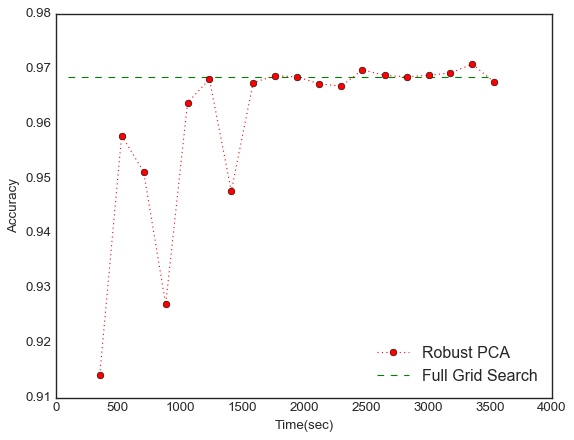

In [41]:
plt.hlines(acc,xmin=100,xmax=total_time_grid, color="green",linestyle = "dashed")
plt.plot(rec_times_tensor,avg_rec_acc_tensor,marker='o',color="red",  linestyle='dotted')
plt.legend(['Robust PCA','Full Grid Search'],loc='lower right')
plt.xlabel("Time(sec)")
plt.ylabel("Accuracy")
plt.savefig("wallclock_tensor.png")